# IMPORT MODEL LEARNING

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,r2_score,accuracy_score,f1_score,confusion_matrix,classification_report, mean_squared_error,silhouette_score
from collections import Counter

In [201]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# IMPORT DATA

In [202]:
df_gold = pd.read_csv(r'C:\Users\baoch\OneDrive\12. DATA ANALYST\KHOA 3 - DA\Lesson 13_ FINAL PROJECT\Future_gold 1.1.12 - 3.7.24.csv')
df_silver = pd.read_csv(r'C:\Users\baoch\OneDrive\12. DATA ANALYST\KHOA 3 - DA\Lesson 13_ FINAL PROJECT\Silver_History.csv')
df_brent = pd.read_csv(r'C:\Users\baoch\OneDrive\12. DATA ANALYST\KHOA 3 - DA\Lesson 13_ FINAL PROJECT\Brent_Oil_History.csv')
df_EGO = pd.read_csv(r'C:\Users\baoch\OneDrive\12. DATA ANALYST\KHOA 3 - DA\Lesson 13_ FINAL PROJECT\EGO_History.csv')
df_platin = pd.read_csv(r'C:\Users\baoch\OneDrive\12. DATA ANALYST\KHOA 3 - DA\Lesson 13_ FINAL PROJECT\Platin_History.csv')
df_USD_VND = pd.read_csv(r'C:\Users\baoch\OneDrive\12. DATA ANALYST\KHOA 3 - DA\Lesson 13_ FINAL PROJECT\USD_VND.csv')
df_USO = pd.read_csv(r'C:\Users\baoch\OneDrive\12. DATA ANALYST\KHOA 3 - DA\Lesson 13_ FINAL PROJECT\USO_HIstory.csv')
df_VNI = pd.read_csv(r'C:\Users\baoch\OneDrive\12. DATA ANALYST\KHOA 3 - DA\Lesson 13_ FINAL PROJECT\VNI_History.csv')
df_Dax = pd.read_csv(r'C:\Users\baoch\OneDrive\12. DATA ANALYST\KHOA 3 - DA\Lesson 13_ FINAL PROJECT\DAX_History.csv')
df_HSeng = pd.read_csv(r'C:\Users\baoch\OneDrive\12. DATA ANALYST\KHOA 3 - DA\Lesson 13_ FINAL PROJECT\Hang_Seng_History.csv')
df_Nikken = pd.read_csv(r'C:\Users\baoch\OneDrive\12. DATA ANALYST\KHOA 3 - DA\Lesson 13_ FINAL PROJECT\Nikkei_History.csv')
df_SP = pd.read_csv(r'C:\Users\baoch\OneDrive\12. DATA ANALYST\KHOA 3 - DA\Lesson 13_ FINAL PROJECT\S&P_History.csv')
df_DJ = pd.read_csv(r'C:\Users\baoch\OneDrive\12. DATA ANALYST\KHOA 3 - DA\Lesson 13_ FINAL PROJECT\DJ_History.csv')

In [203]:
list = [df_gold,df_silver,df_VNI,df_EGO,df_USD_VND,df_USO,df_brent,df_platin,df_HSeng,df_Nikken,df_Dax,df_SP, df_DJ]

In [204]:
df = list[0]
for i in list[1:]:
    df = pd.merge(df, i, how='left', on='Date')
df

,Date,Close,Open,High,Low,Volume,Change,Silver_Close,Silver_Volume,Silver_Change,VNI_Close,VNI_Volume,VNI_Change,EGO_Closing,EGO_Volume,EGO_Change,USD_VND_Rate,USD_VND_Change,USO_Close,USO_Volume,USO_Change,Brient_Oil_Close,Brient_Oil_Volume,Brient_Oil_Change,Platin_Close,Platin_Volume,Platin_Change,Hseng_Close,Hseng_Volume,Hseng_Change,Nikkei_Close,Nikkei_Volume,Nikkei_Change,Dax_Close,Dax_Volume,Dax_Change,SP_Close,SP_Change,DJ_Close,DJ_Volume,DJ_Change
0,3/7/2024,"2,372.45","2,339.45","2,372.85","2,335.95",NaN,1.67%,30.84,75.32K,3.99%,"1,276.85",589.51K,0.56%,15.47,892.57K,4.39%,"25,450.00",0.00%,81.27,734.05K,0.20%,87.34,334.82K,1.28%,"1,013.40",NaN,0.42%,"17,978.57",3.09B,1.18%,"40,725.00",36.29K,1.27%,"18,374.53",59.16M,1.16%,"5,537.02",0.51%,"39,308.00",202.07M,-0.06%
1,2/7/2024,"2,333.40","2,341.60","2,346.10","2,327.40",153.71K,-0.24%,29.66,52.27K,0.15%,"1,269.79",528.47K,1.21%,14.82,1.59M,0.95%,"25,450.00",0.00%,81.11,1.18M,-0.53%,86.24,429.15K,-0.42%,"1,009.20",NaN,2.07%,"17,769.14",3.37B,0.29%,"40,212.50",40.70K,1.77%,"18,164.06",57.15M,-0.69%,"5,509.01",0.62%,"39,331.85",325.02M,0.41%
2,1/7/2024,"2,338.90","2,338.90","2,348.80","2,328.20",142.60K,-0.03%,29.61,45.99K,0.18%,"1,254.56",487.19K,0.74%,14.68,582.57K,-0.74%,"25,450.00",0.02%,81.54,2.27M,2.45%,86.60,401.36K,0.22%,988.7,NaN,-2.00%,NaN,NaN,NaN,"39,512.50",31.65K,-0.25%,"18,290.66",55.85M,0.30%,"5,475.09",0.27%,"39,169.52",353.38M,0.13%
3,28/06/2024,"2,339.60","2,338.60","2,350.60","2,329.70",135.38K,0.13%,29.56,51.91K,1.04%,"1,245.32",840.43K,-1.09%,14.79,813.22K,-0.14%,"25,445.00",-0.04%,79.59,1.36M,-0.41%,86.41,20.94K,0.02%,"1,014.10",32.57K,0.79%,"17,718.61",2.83B,0.01%,"39,610.00",32.03K,0.14%,"18,235.45",64.59M,0.14%,"5,460.48",-0.41%,"39,118.86",688.50M,-0.12%
4,27/06/2024,"2,336.60","2,309.40","2,342.00","2,306.80",140.23K,1.55%,29.26,63.25K,0.57%,"1,259.09",596.99K,-0.17%,14.81,1.27M,0.20%,"25,455.00",-0.04%,79.92,1.79M,1.49%,86.39,119.99K,1.34%,"1,006.20",31.99K,-2.73%,"17,716.47",2.81B,-2.06%,"39,555.00",35.30K,-0.20%,"18,210.55",54.45M,0.30%,"5,482.87",0.09%,"39,164.06",352.60M,0.09%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,9/1/2012,"1,608.10","1,617.70","1,624.60","1,605.70",134.39K,-0.54%,28.78,30.25K,0.35%,339.32,171.19K,0.77%,71.95,615.83K,0.00%,"21,034.50",0.00%,312.64,939.03K,-0.36%,112.45,203.39K,-0.54%,"1,426.15",NaN,2.01%,"18,865.72",1.38B,1.47%,"8,407.50",NaN,0.21%,"6,017.23",110.95M,-0.67%,"1,280.70",0.23%,"12,392.69",122.20M,0.27%
3146,6/1/2012,"1,616.80","1,622.40","1,632.30","1,609.00",155.21K,-0.20%,28.68,38.61K,-2.09%,336.73,29.08K,-1.23%,71.95,461.45K,-1.71%,"21,033.50",0.01%,313.76,1.22M,0.13%,113.06,190.83K,0.28%,"1,406.55",NaN,-1.03%,"18,593.06",1.43B,-1.17%,"8,390.00",53.28K,-1.29%,"6,057.92",109.97M,-0.62%,"1,277.80",-0.26%,"12,359.92",131.12M,-0.45%
3147,5/1/2012,"1,620.10","1,614.40","1,626.80","1,597.70",176.47K,0.46%,29.30,39.30K,0.68%,340.94,20.63K,-2.26%,73.20,534.35K,0.14%,"21,031.00",0.00%,313.36,1.47M,-1.51%,112.74,205.41K,-0.84%,"1,421.25",NaN,-0.34%,"18,813.41",1.04B,0.46%,"8,500.00",24.78K,-0.35%,"6,095.99",141.74M,-0.25%,"1,281.10",0.30%,"12,415.70",158.44M,-0.02%
3148,4/1/2012,"1,612.70","1,604.90","1,619.80","1,593.80",154.22K,0.76%,29.10,36.12K,-1.61%,348.84,25.45K,-0.33%,73.10,743.48K,-0.81%,"21,031.00",0.00%,318.16,1.73M,0.20%,113.70,221.27K,1.40%,"1,426.05",NaN,-0.71%,"18,727.31",1.17B,-0.80%,"8,530.00",38.06K,-0.09%,"6,111.55",100.87M,-0.89%,"1,277.30",0.02%,"12,418.42",145.13M,0.17%


# EDA

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               3150 non-null   object 
 1   Close              3150 non-null   object 
 2   Open               3150 non-null   object 
 3   High               3150 non-null   object 
 4   Low                3150 non-null   object 
 5   Volume             3147 non-null   object 
 6   Change             3150 non-null   object 
 7   Silver_Close       3150 non-null   float64
 8   Silver_Volume      3094 non-null   object 
 9   Silver_Change      3150 non-null   object 
 10  VNI_Close          3021 non-null   object 
 11  VNI_Volume         3021 non-null   object 
 12  VNI_Change         3021 non-null   object 
 13  EGO_Closing        3069 non-null   float64
 14  EGO_Volume         3069 non-null   object 
 15  EGO_Change         3069 non-null   object 
 16  USD_VND_Rate       3107 

1. CHECK NULL

In [206]:
df.isnull().values.any() #=> Có xuất hiện null trong dữ liệu


True

In [207]:
df.isnull().sum()

Date                    0
Close                   0
Open                    0
High                    0
Low                     0
Volume                  3
Change                  0
Silver_Close            0
Silver_Volume          56
Silver_Change           0
VNI_Close             129
VNI_Volume            129
VNI_Change            129
EGO_Closing            81
EGO_Volume             81
EGO_Change             81
USD_VND_Rate           43
USD_VND_Change         43
USO_Close              80
USO_Volume             81
USO_Change             80
Brient_Oil_Close        0
Brient_Oil_Volume       1
Brient_Oil_Change       0
Platin_Close            0
Platin_Volume        2447
Platin_Change           0
Hseng_Close           147
Hseng_Volume          152
Hseng_Change          147
Nikkei_Close            0
Nikkei_Volume         194
Nikkei_Change           0
Dax_Close              57
Dax_Volume             58
Dax_Change             57
SP_Close               81
SP_Change              81
DJ_Close    

**GHI CHÚ**

* Tổng cộng có 3150 dòng dữ liệu

* Cột Platin Volume xuất hiện nhiều giá trị null nên xóa cột để hạn chế mất nhiều dữ liệu

* Xóa các dòng dữ liệu chứa các giá trị null còn lại trong tệp dữ liệu

* Chuyển đổi cột date sang dạng dữ liệu Datetime

In [208]:
#Drop columns which contains various null
df.drop(columns=['Platin_Volume'], inplace=True)

#Drop 
df = df.fillna(method='ffill')

# ADJUST 'DATE' COLUMN TO DATETIME FORMAT
df.Date = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df.dropna(inplace=True)

C:\Users\baoch\AppData\Local\Temp\ipykernel_13876\1597913952.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [209]:
df.isnull().values.any()

False

2. ADJUST NUMERIC COLUMN TO FLOAT FORMAT

In [210]:
# Find columns containing the string 'Volume'
volume_columns = df.columns[df.columns.str.contains('Volume')]
volume_columns

Index(['Volume', 'Silver_Volume', 'VNI_Volume', 'EGO_Volume', 'USO_Volume',
       'Brient_Oil_Volume', 'Hseng_Volume', 'Nikkei_Volume', 'Dax_Volume',
       'DJ_Volume'],
      dtype='object')

In [211]:
def convert_volume(value):
    if isinstance(value, str):  # Check if the value is a string
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
        elif 'B' in value:
            return float(value.replace('B', '')) * 1_000_000_000
        else:
            return float(value)
    else:  # If the value is already a float, return it as is
        return value

df[volume_columns] = df[volume_columns].applymap(convert_volume)

C:\Users\baoch\AppData\Local\Temp\ipykernel_13876\2200560162.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[volume_columns] = df[volume_columns].applymap(convert_volume)


In [212]:
change_columns = df.columns[df.columns.str.contains('Change')]
change_columns

Index(['Change', 'Silver_Change', 'VNI_Change', 'EGO_Change', 'USD_VND_Change',
       'USO_Change', 'Brient_Oil_Change', 'Platin_Change', 'Hseng_Change',
       'Nikkei_Change', 'Dax_Change', 'SP_Change', 'DJ_Change'],
      dtype='object')

In [213]:
df[change_columns]=df[change_columns].replace("%","", regex=True).astype(float)

In [214]:
number_column = df.select_dtypes(include='object').columns
number_column

Index(['Close', 'Open', 'High', 'Low', 'VNI_Close', 'USD_VND_Rate',
       'Platin_Close', 'Hseng_Close', 'Nikkei_Close', 'Dax_Close', 'SP_Close',
       'DJ_Close'],
      dtype='object')

In [215]:
df[number_column] = df[number_column].replace(",","",regex=True).astype(float)

3. RESET INDEX AND REVERSE THE ORDER OF DATE COLUMN FROM 2012 - 2024

In [216]:
df = df.sort_values(by = 'Date').reset_index(drop=True)

4. FINISH DATASET

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149 entries, 0 to 3148
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               3149 non-null   datetime64[ns]
 1   Close              3149 non-null   float64       
 2   Open               3149 non-null   float64       
 3   High               3149 non-null   float64       
 4   Low                3149 non-null   float64       
 5   Volume             3149 non-null   float64       
 6   Change             3149 non-null   float64       
 7   Silver_Close       3149 non-null   float64       
 8   Silver_Volume      3149 non-null   float64       
 9   Silver_Change      3149 non-null   float64       
 10  VNI_Close          3149 non-null   float64       
 11  VNI_Volume         3149 non-null   float64       
 12  VNI_Change         3149 non-null   float64       
 13  EGO_Closing        3149 non-null   float64       
 14  EGO_Volu

In [218]:
df

,Date,Close,Open,High,Low,Volume,Change,Silver_Close,Silver_Volume,Silver_Change,VNI_Close,VNI_Volume,VNI_Change,EGO_Closing,EGO_Volume,EGO_Change,USD_VND_Rate,USD_VND_Change,USO_Close,USO_Volume,USO_Change,Brient_Oil_Close,Brient_Oil_Volume,Brient_Oil_Change,Platin_Close,Platin_Change,Hseng_Close,Hseng_Volume,Hseng_Change,Nikkei_Close,Nikkei_Volume,Nikkei_Change,Dax_Close,Dax_Volume,Dax_Change,SP_Close,SP_Change,DJ_Close,DJ_Volume,DJ_Change
0,2012-01-03,"1,600.50","1,571.00","1,608.70","1,566.80","112,940.00",2.15,29.57,"35,830.00",5.94,350.00,"20,640.00",-0.44,73.70,"695,390.00",7.51,"21,031.00",-0.01,317.52,"1,550,000.00",4.15,112.13,"178,620.00",4.42,"1,436.20",1.96,"18,877.41","1,250,000,000.00",2.40,"8,537.50","38,060.00",0.02,"6,166.57","116,710,000.00",1.50,"1,277.10",1.55,"12,397.38","152,560,000.00",1.47
1,2012-01-04,"1,612.70","1,604.90","1,619.80","1,593.80","154,220.00",0.76,29.10,"36,120.00",-1.61,348.84,"25,450.00",-0.33,73.10,"743,480.00",-0.81,"21,031.00",0.00,318.16,"1,730,000.00",0.20,113.70,"221,270.00",1.40,"1,426.05",-0.71,"18,727.31","1,170,000,000.00",-0.80,"8,530.00","38,060.00",-0.09,"6,111.55","100,870,000.00",-0.89,"1,277.30",0.02,"12,418.42","145,130,000.00",0.17
2,2012-01-05,"1,620.10","1,614.40","1,626.80","1,597.70","176,470.00",0.46,29.30,"39,300.00",0.68,340.94,"20,630.00",-2.26,73.20,"534,350.00",0.14,"21,031.00",0.00,313.36,"1,470,000.00",-1.51,112.74,"205,410.00",-0.84,"1,421.25",-0.34,"18,813.41","1,040,000,000.00",0.46,"8,500.00","24,780.00",-0.35,"6,095.99","141,740,000.00",-0.25,"1,281.10",0.30,"12,415.70","158,440,000.00",-0.02
3,2012-01-06,"1,616.80","1,622.40","1,632.30","1,609.00","155,210.00",-0.20,28.68,"38,610.00",-2.09,336.73,"29,080.00",-1.23,71.95,"461,450.00",-1.71,"21,033.50",0.01,313.76,"1,220,000.00",0.13,113.06,"190,830.00",0.28,"1,406.55",-1.03,"18,593.06","1,430,000,000.00",-1.17,"8,390.00","53,280.00",-1.29,"6,057.92","109,970,000.00",-0.62,"1,277.80",-0.26,"12,359.92","131,120,000.00",-0.45
4,2012-01-09,"1,608.10","1,617.70","1,624.60","1,605.70","134,390.00",-0.54,28.78,"30,250.00",0.35,339.32,"171,190.00",0.77,71.95,"615,830.00",0.00,"21,034.50",0.00,312.64,"939,030.00",-0.36,112.45,"203,390.00",-0.54,"1,426.15",2.01,"18,865.72","1,380,000,000.00",1.47,"8,407.50","28,860.00",0.21,"6,017.23","110,950,000.00",-0.67,"1,280.70",0.23,"12,392.69","122,200,000.00",0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,2024-06-26,"2,301.00","2,318.80","2,320.50","2,292.90",990.00,-0.75,29.09,"1,290.00",0.22,"1,261.24","878,370.00",0.37,14.78,"1,350,000.00",-1.47,"25,465.00",0.04,78.75,"1,580,000.00",-0.19,85.25,"142,860.00",0.28,"1,034.40",3.54,"18,089.93","2,310,000,000.00",0.09,"39,635.00","32,720.00",1.29,"18,155.24","56,450,000.00",-0.12,"5,477.90",0.16,"39,127.80","340,840,000.00",0.04
3145,2024-06-27,"2,336.60","2,309.40","2,342.00","2,306.80","140,230.00",1.55,29.26,"63,250.00",0.57,"1,259.09","596,990.00",-0.17,14.81,"1,270,000.00",0.20,"25,455.00",-0.04,79.92,"1,790,000.00",1.49,86.39,"119,990.00",1.34,"1,006.20",-2.73,"17,716.47","2,810,000,000.00",-2.06,"39,555.00","35,300.00",-0.20,"18,210.55","54,450,000.00",0.30,"5,482.87",0.09,"39,164.06","352,600,000.00",0.09
3146,2024-06-28,"2,339.60","2,338.60","2,350.60","2,329.70","135,380.00",0.13,29.56,"51,910.00",1.04,"1,245.32","840,430.00",-1.09,14.79,"813,220.00",-0.14,"25,445.00",-0.04,79.59,"1,360,000.00",-0.41,86.41,"20,940.00",0.02,"1,014.10",0.79,"17,718.61","2,830,000,000.00",0.01,"39,610.00","32,030.00",0.14,"18,235.45","64,590,000.00",0.14,"5,460.48",-0.41,"39,118.86","688,500,000.00",-0.12
3147,2024-07-01,"2,338.90","2,338.90","2,348.80","2,328.20","142,600.00",-0.03,29.61,"45,990.00",0.18,"1,254.56","487,190.00",0.74,14.68,"582,570.00",-0.74,"25,450.00",0.02,81.54,"2,270,000.00",2.45,86.60,"401,360.00",0.22,988.70,-2.00,"17,769.14","3,370,000,000.00",0.29,"39,512.50","31,650.00",-0.25,"18

# UNVARIATE ANALYST

In [219]:
df.describe()

,Date,Close,Open,High,Low,Volume,Change,Silver_Close,Silver_Volume,Silver_Change,VNI_Close,VNI_Volume,VNI_Change,EGO_Closing,EGO_Volume,EGO_Change,USD_VND_Rate,USD_VND_Change,USO_Close,USO_Volume,USO_Change,Brient_Oil_Close,Brient_Oil_Volume,Brient_Oil_Change,Platin_Close,Platin_Change,Hseng_Close,Hseng_Volume,Hseng_Change,Nikkei_Close,Nikkei_Volume,Nikkei_Change,Dax_Close,Dax_Volume,Dax_Change,SP_Close,SP_Change,DJ_Close,DJ_Volume,DJ_Change
count,3149,"3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00","3,149.00"
mean,2018-04-02 10:51:10.689107456,"1,531.03","1,531.23","1,541.82","1,520.05","207,545.75",0.02,20.82,"60,214.43",0.02,850.47,"492,821.11",0.05,19.86,"1,603,057.59",0.02,"22,581.39",0.01,128.60,"3,656,362.53",0.00,75.68,"233,512.10",0.04,"1,085.66",-0.00,"23,603.87","1,989,782,851.70",0.01,"21,344.95","61,728.47",0.06,"11,896.41","93,703,213.72",0.05,"2,853.00",0.05,"24,061.67","250,919,021.91",0.04
min,2012-01-03 00:00:00,"1,049.60","1,051.50","1,062.70","1,045.40",390.00,-9.34,11.77,0.00,-11.61,336.73,"15,950.00",-6.67,2.64,"164,950.00",-28.57,"20,817.00",-1.52,17.04,"114,970.00",-25.32,19.33,430.00,-24.40,595.20,-12.11,"14,687.02","483,980,000.00",-6.36,"8,290.00",0.00,-8.36,"5,969.40","1,220,000.00",-12.24,"1,277.10",-11.98,"12,101.46","33,640,000.00",-12.93
25%,2015-02-18 00:00:00,"1,264.80","1,265.20","1,272.80","1,256.80","145,490.00",-0.45,16.59,"41,390.00",-0.84,574.54,"110,420.00",-0.44,8.47,"869,380.00",-1.90,"21,387.50",-0.02,71.60,"1,570,000.00",-1.09,55.72,"178,310.00",-0.98,915.70,-0.86,"20,890.26","1,490,000,000.00",-0.68,"16,480.00","41,540.00",-0.59,"9,793.71","68,380,000.00",-0.49,"2,000.10",-0.37,"17,113.54","114,050,000.00",-0.36
50%,2018-04-04 00:00:00,"1,436.60","1,447.70","1,458.20","1,423.00","188,890.00",0.02,19.58,"56,230.00",0.01,864.50,"180,520.00",0.12,12.21,"1,300,000.00",0.00,"22,755.00",0.00,90.36,"2,970,000.00",0.08,73.41,"234,620.00",0.10,987.10,-0.01,"23,336.52","1,830,000,000.00",0.03,"20,855.00","57,850.00",0.06,"12,059.57","84,790,000.00",0.09,"2,658.60",0.06,"24,189.45","265,390,000.00",0.06
75%,2021-05-18 00:00:00,"1,791.00","1,790.90","1,802.00","1,780.00","247,720.00",0.52,24.15,"74,310.00",0.85,"1,077.59","551,330.00",0.69,25.85,"1,940,000.00",1.91,"23,211.50",0.03,160.16,"4,610,000.00",1.18,97.80,"293,330.00",1.10,"1,216.15",0.81,"26,376.18","2,300,000,000.00",0.70,"26,855.00","78,200.00",0.77,"13,643.95","107,430,000.00",0.66,"3,856.10",0.56,"31,496.30","339,210,000.00",0.52
max,2024-07-02 00:00:00,"2,449.50","2,442.30","2,464.50","2,425.60","816,530.00",5.95,37.20,"355,280.00",9.30,"1,528.57","121,250,000.00",4.98,79.80,"20,230,000.00",32.05,"25,469.00",1.38,336.08,"125,410,000.00",16.67,127.98,"779,720.00",21.02,"1,737.60",10.44,"33,154.12","7,110,000,000.00",9.08,"40,810.00","445,050.00",7.95,"18,869.36","412,540,000.00",10.98,"5,509.01",9.38,"40,003.59","922,680,000.00",11.37
std,NaN,310.43,310.39,312.92,307.78,"90,350.38",0.98,5.14,"32,179.87",1.80,304.76,"4,213,135.89",1.18,17.74,"1,175,567.36",3.61,"1,096.53",0.13,89.28,"4,495,690.20",2.27,24.47,"98,208.23",2.29,244.54,1.52,"3,677.76","741,874,301.12",1.29,"7,020.04","39,024.11",1.28,"2,844.56","39,690,081.16",1.19,"1,082.67",1.05,"7,815.29","140,636,961.82",1.03


**GHI CHÚ**

* Giá vàng cao nhất là **2403 USD /lượng** (22/05/2024), trong ngày giao dịch, giá vàng tăng mạnh lên đến **2440 USD/lượng** và thấp nhất là **1049.6 USD/lượng** (17/12/2015)

* Trong thời gian qua, giá vàng tăng mạnh nhất trong ngày là gần 6% (ngày 24/3/2020)

* Khối lượng giao dịch vàng tăng mạnh qua thời gian, đa số giao dịch 246k hợp đồng trong 1 ngày và đạt cao nhất là 816k Hợp đồng trong 1 ngày (trong ngày 09/11/2016) 

In [220]:
df[df['Close'] == 2449.5]

,Date,Close,Open,High,Low,Volume,Change,Silver_Close,Silver_Volume,Silver_Change,VNI_Close,VNI_Volume,VNI_Change,EGO_Closing,EGO_Volume,EGO_Change,USD_VND_Rate,USD_VND_Change,USO_Close,USO_Volume,USO_Change,Brient_Oil_Close,Brient_Oil_Volume,Brient_Oil_Change,Platin_Close,Platin_Change,Hseng_Close,Hseng_Volume,Hseng_Change,Nikkei_Close,Nikkei_Volume,Nikkei_Change,Dax_Close,Dax_Volume,Dax_Change,SP_Close,SP_Change,DJ_Close,DJ_Volume,DJ_Change
3117,2024-05-20,"2,449.50","2,438.60","2,464.50","2,425.60","281,430.00",0.86,32.27,"1,780.00",3.69,"1,277.58","1,160,000.00",0.35,16.48,"1,420,000.00",1.79,"25,452.00",0.02,76.73,"2,040,000.00",-0.31,83.71,"299,830.00",-0.32,"1,062.50",-2.98,"19,636.22","3,500,000,000.00",0.42,"39,320.00","27,600.00",1.47,"18,768.96","41,190,000.00",0.35,"5,308.13",0.09,"39,806.77","275,310,000.00",-0.49


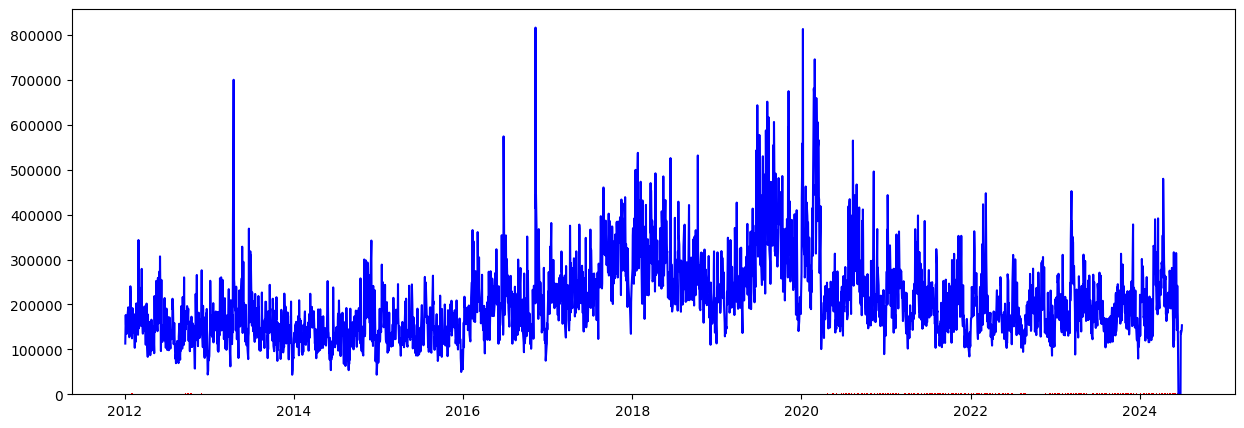

In [221]:
plt.figure(figsize=(15,5))
plt.bar(df['Date'], df['Close'], color='red', label='Close Price')
plt.plot(df['Date'], df['Volume'], color='blue', label='Close Price')

<Axes: >

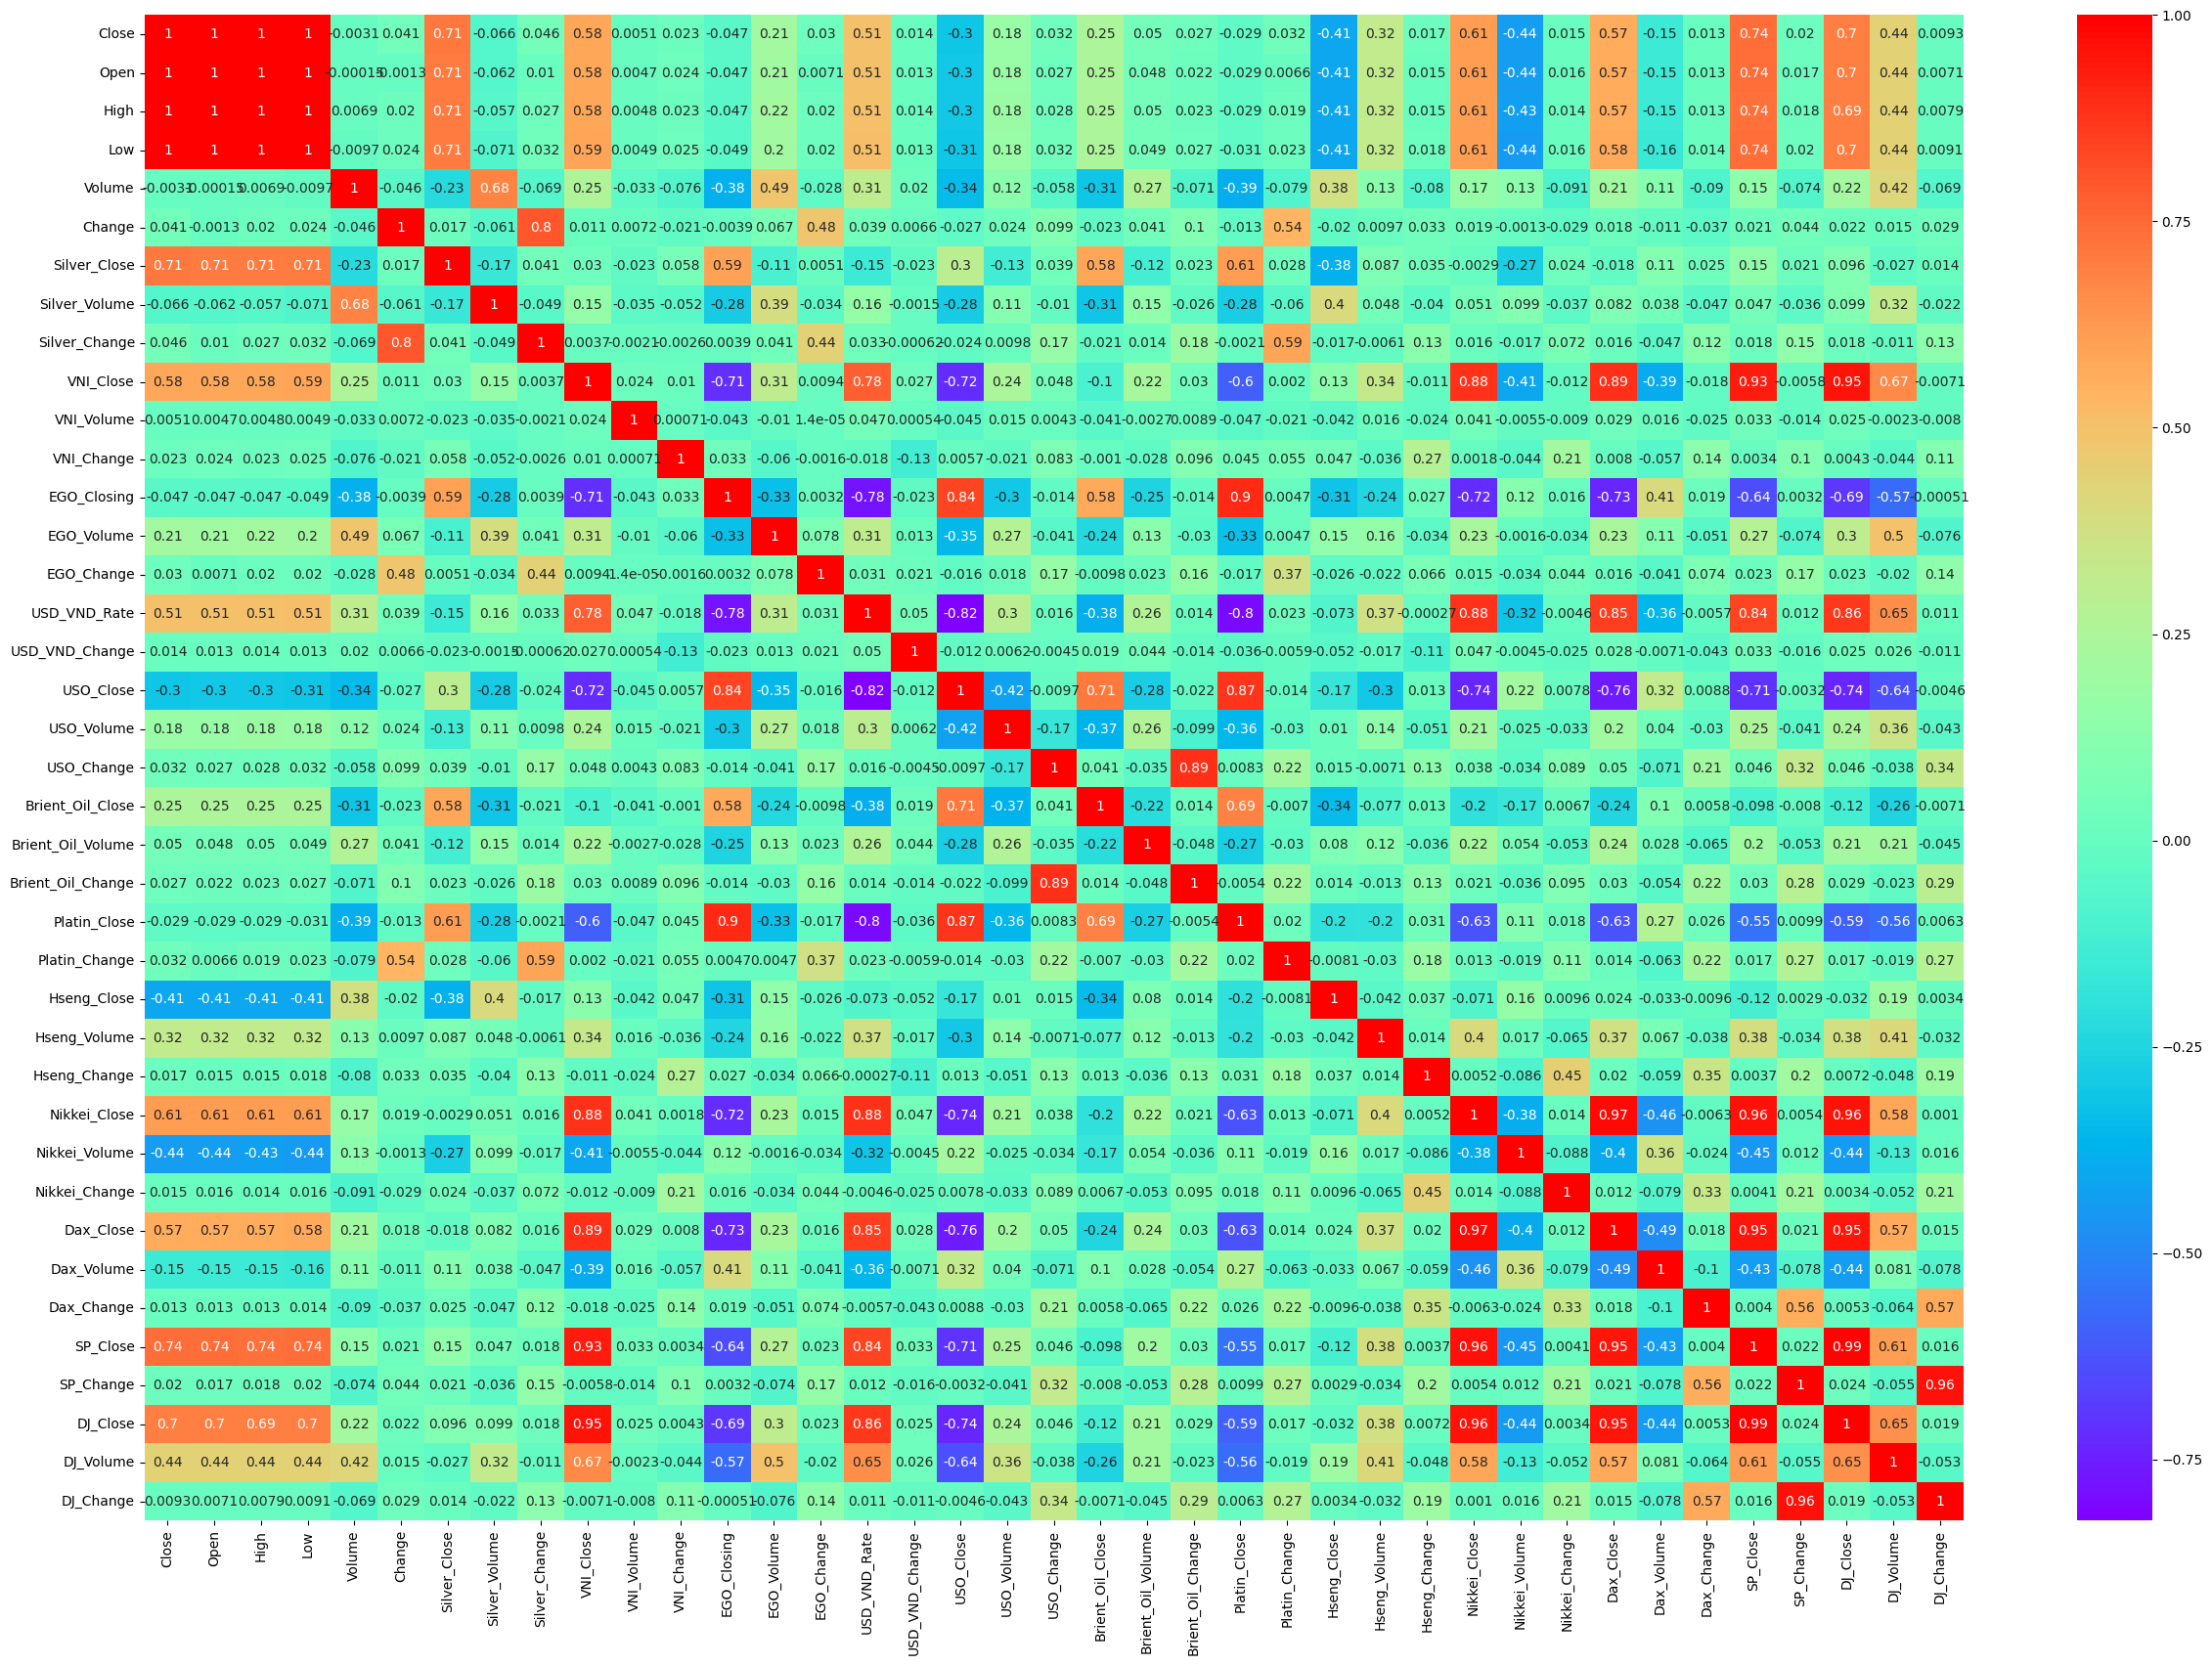

In [222]:
plt.figure(figsize=(30,20))
sns.heatmap(df.select_dtypes(include='float64').corr(),cmap='rainbow', annot=True)

In [223]:
corr = df.corr().abs()['Close'].sort_values(ascending = False).head(60)
corr

Close               1.00
Low                 1.00
High                1.00
Open                1.00
SP_Close            0.74
Silver_Close        0.71
DJ_Close            0.70
Date                0.65
Nikkei_Close        0.61
VNI_Close           0.58
Dax_Close           0.57
USD_VND_Rate        0.51
DJ_Volume           0.44
Nikkei_Volume       0.44
Hseng_Close         0.41
Hseng_Volume        0.32
USO_Close           0.30
Brient_Oil_Close    0.25
EGO_Volume          0.21
USO_Volume          0.18
Dax_Volume          0.15
Silver_Volume       0.07
Brient_Oil_Volume   0.05
EGO_Closing         0.05
Silver_Change       0.05
Change              0.04
USO_Change          0.03
Platin_Change       0.03
EGO_Change          0.03
Platin_Close        0.03
Brient_Oil_Change   0.03
VNI_Change          0.02
SP_Change           0.02
Hseng_Change        0.02
Nikkei_Change       0.02
USD_VND_Change      0.01
Dax_Change          0.01
DJ_Change           0.01
VNI_Volume          0.01
Volume              0.00


**GHI CHÚ**

* Các chỉ số SP, Silver, Nikkei,VNI,Dax,USD_VND, Hengseng có tỷ lệ tương quan với giá vàng khá nhiều (>35%)

* Các chỉ số USO, Brient_Oil có độ tương quan thấp => Xóa bớt các cột có độ tương quan nhỏ hơn 35%

In [224]:
# Drop columns with corr = 1
df.drop(columns=['Low','Open','High'], inplace=True)

In [225]:
to_drop = corr[corr < 0.35].index
df.drop(columns=to_drop, axis = 1, inplace=True)

NUMERICAL FEATURES

In [226]:
numerical_feature = [feature for feature in df.columns if ((df[feature].dtypes != 'Object') & (feature not in ['Close', 'Date']))]
print('Number of numerical variables:',len(numerical_feature))
numerical_feature

Number of numerical variables: 10


['Silver_Close',
 'VNI_Close',
 'USD_VND_Rate',
 'Hseng_Close',
 'Nikkei_Close',
 'Nikkei_Volume',
 'Dax_Close',
 'SP_Close',
 'DJ_Close',
 'DJ_Volume']

In [227]:
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique()<25)]
format(len(discrete_feature))

'10'

In [228]:
# Các giá trị độc lập trong từng cột:
for feature in numerical_feature:
    print(feature)
    print(len(df[feature]))
    print(format(len(df[feature].unique())))
    print('XXX---'*4)
    

Silver_Close
3149
2826
XXX---XXX---XXX---XXX---
VNI_Close
3149
2955
XXX---XXX---XXX---XXX---
USD_VND_Rate
3149
1242
XXX---XXX---XXX---XXX---
Hseng_Close
3149
2999
XXX---XXX---XXX---XXX---
Nikkei_Close
3149
1984
XXX---XXX---XXX---XXX---
Nikkei_Volume
3149
2347
XXX---XXX---XXX---XXX---
Dax_Close
3149
3088
XXX---XXX---XXX---XXX---
SP_Close
3149
2913
XXX---XXX---XXX---XXX---
DJ_Close
3149
3056
XXX---XXX---XXX---XXX---
DJ_Volume
3149
2926
XXX---XXX---XXX---XXX---


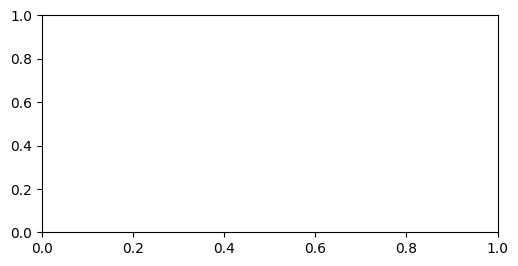

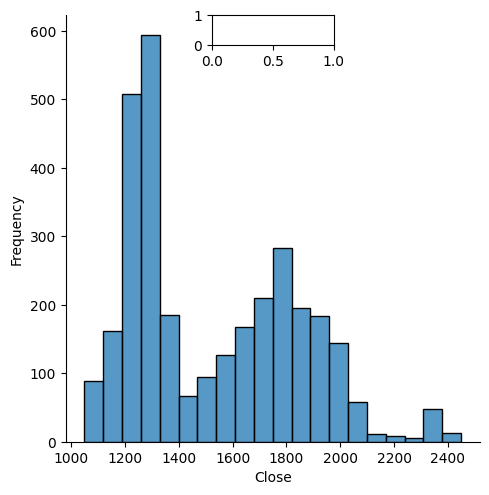

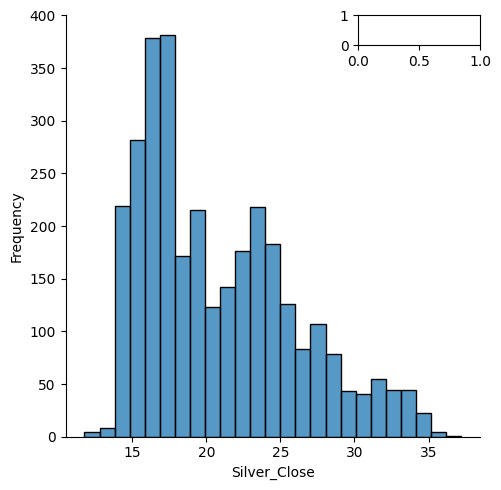

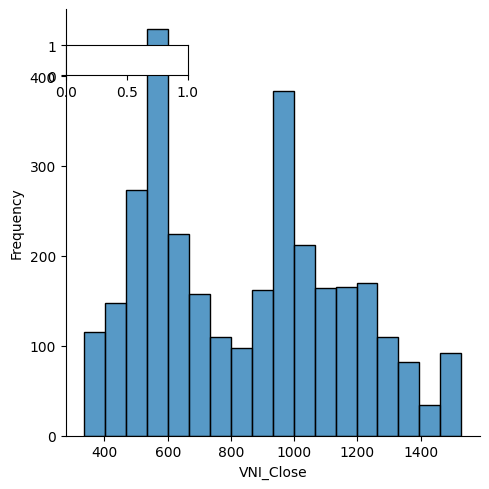

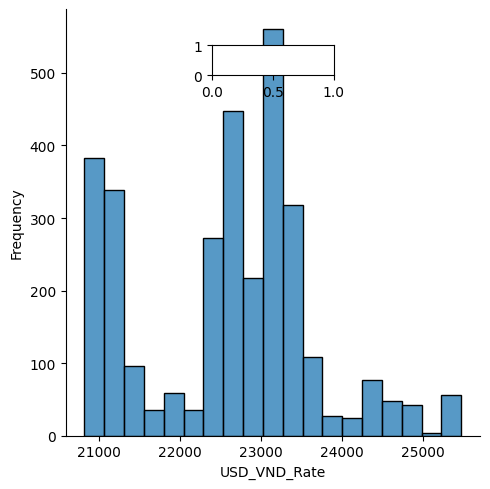

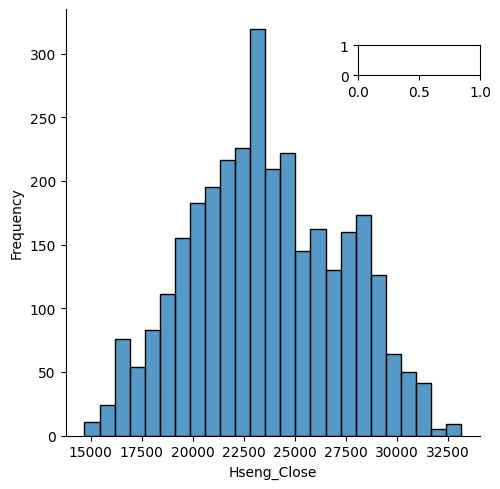

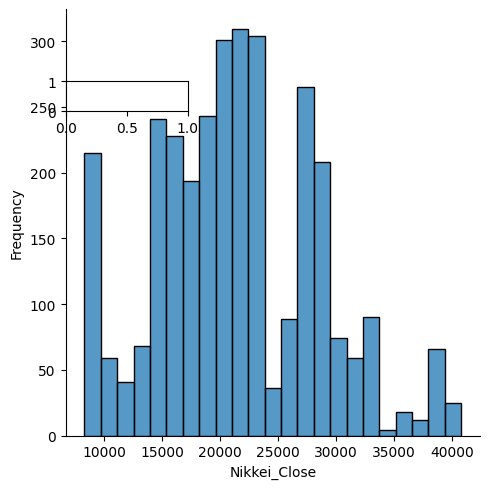

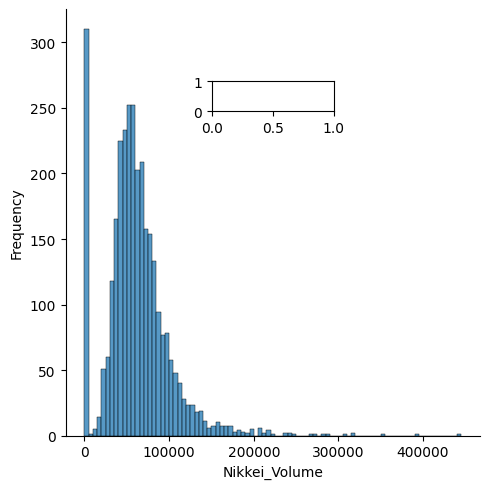

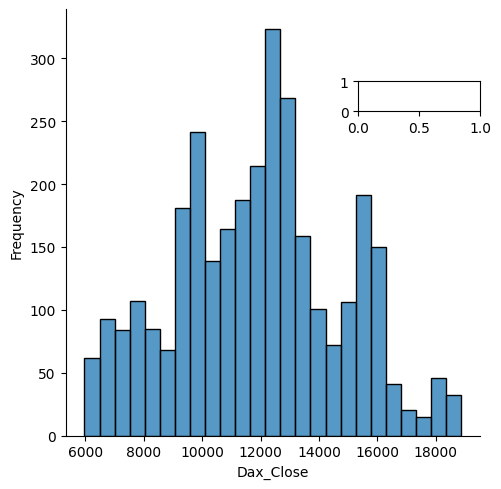

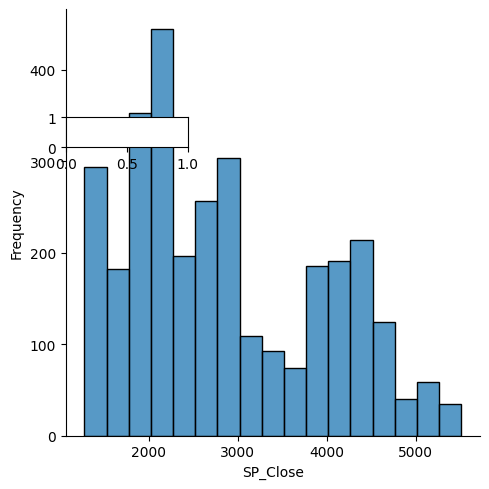

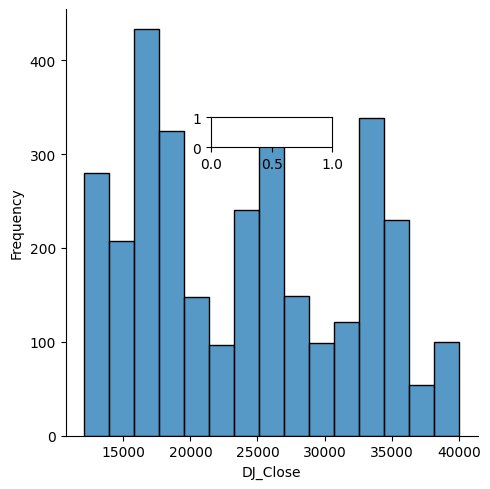

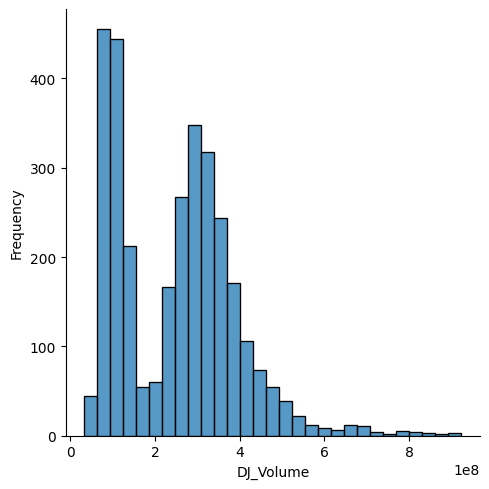

In [229]:
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1
for i in df.drop(columns='Date').columns: 
    ax = plt.subplot(12,3,plotnumber)
    sns.displot(df[i])
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plotnumber +=1
plt.show()

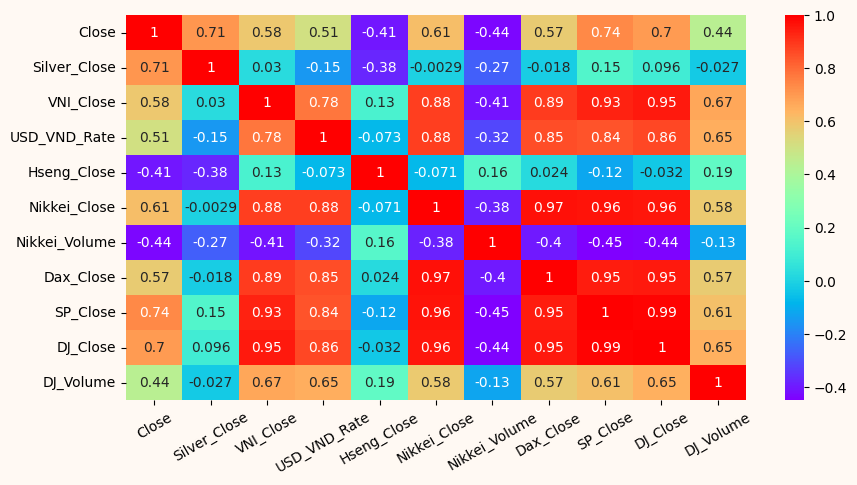

In [230]:
plt.figure(figsize=(10, 5), facecolor='#fff9f3')
sns.heatmap(df.select_dtypes(include='float64').corr(), cmap='rainbow', annot=True)
plt.gca().set_facecolor('#fff9f3')
plt.xticks(rotation=30)
plt.show()

In [231]:
df

,Date,Close,Silver_Close,VNI_Close,USD_VND_Rate,Hseng_Close,Nikkei_Close,Nikkei_Volume,Dax_Close,SP_Close,DJ_Close,DJ_Volume
0,2012-01-03,"1,600.50",29.57,350.00,"21,031.00","18,877.41","8,537.50","38,060.00","6,166.57","1,277.10","12,397.38","152,560,000.00"
1,2012-01-04,"1,612.70",29.10,348.84,"21,031.00","18,727.31","8,530.00","38,060.00","6,111.55","1,277.30","12,418.42","145,130,000.00"
2,2012-01-05,"1,620.10",29.30,340.94,"21,031.00","18,813.41","8,500.00","24,780.00","6,095.99","1,281.10","12,415.70","158,440,000.00"
3,2012-01-06,"1,616.80",28.68,336.73,"21,033.50","18,593.06","8,390.00","53,280.00","6,057.92","1,277.80","12,359.92","131,120,000.00"
4,2012-01-09,"1,608.10",28.78,339.32,"21,034.50","18,865.72","8,407.50","28,860.00","6,017.23","1,280.70","12,392.69","122,200,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...
3144,2024-06-26,"2,301.00",29.09,"1,261.24","25,465.00","18,089.93","39,635.00","32,720.00","18,155.24","5,477.90","39,127.80","340,840,000.00"
3145,2024-06-27,"2,336.60",29.26,"1,259.09","25,455.00","17,716.47","39,555.00","35,300.00","18,210.55","5,482.87","39,164.06","352,600,000.00"
3146,2024-06-28,"2,339.60",29.56,"1,245.32","25,445.00","17,718.61","39,610.00","32,030.00","18,235.45","5,460.48","39,118.86","688,500,000.00"
3147,2024-07-01,"2,338.90",29.61,"1,254.56","25,450.00","17,769.14","39,512.50","31,650.00","18,290.66","5,475.09","39,169.52","353,380,000.00"


* Relationship between Cotinous numerical Features and Labels

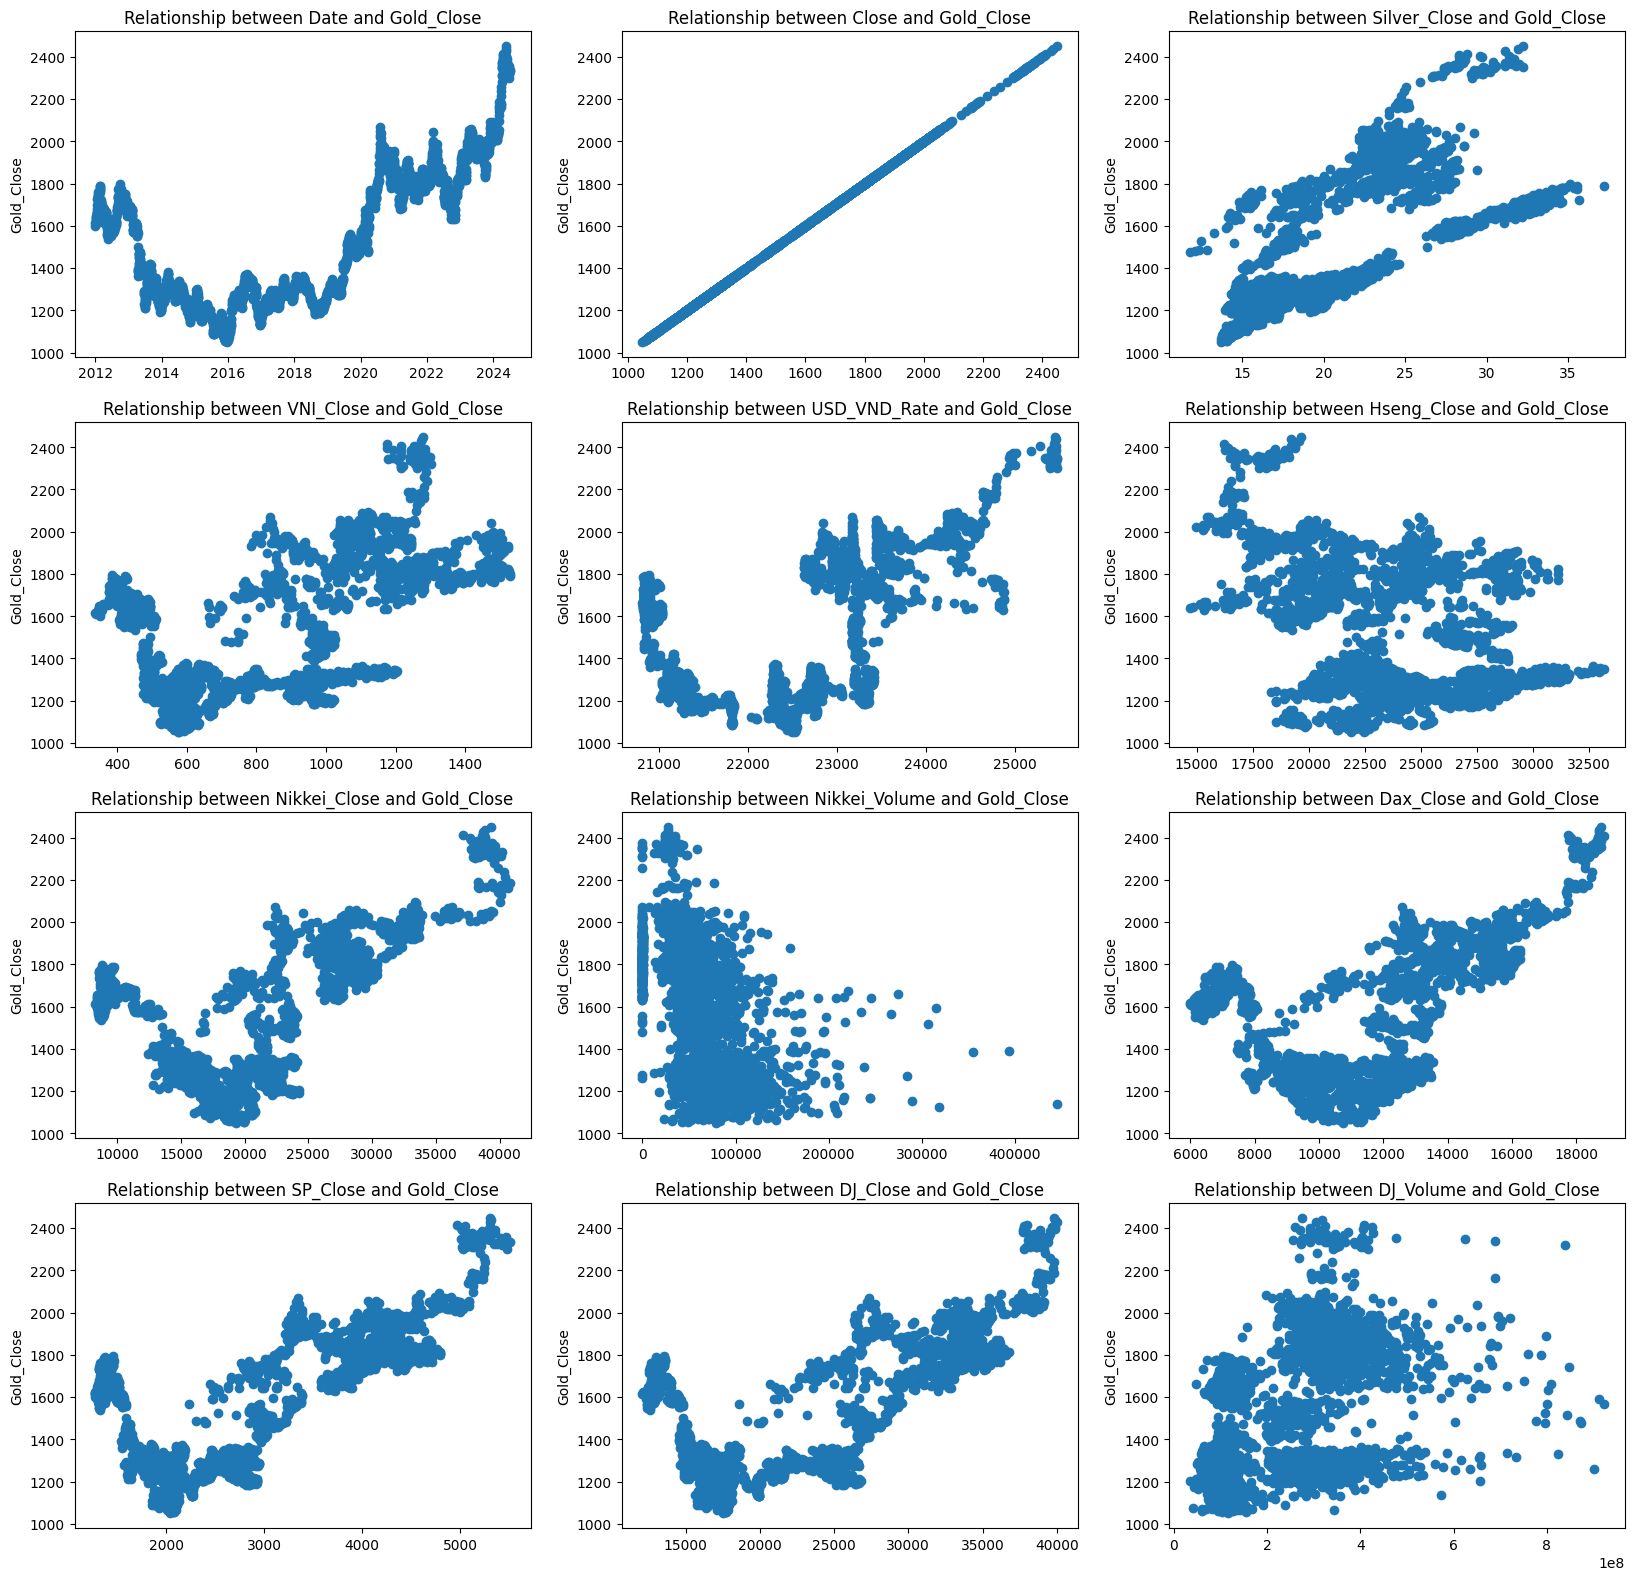

In [232]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for i in df: 
    data = df.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(data[i], data['Close'])
    plt.ylabel('Gold_Close')
    plt.title(f'Relationship between {i} and Gold_Close')
    plotnumber +=1
plt.show()

**GHI CHÚ**
* Date: Giá vàng tăng theo thời gian

* Silver_price: Giá bạc tăng cũng làm cho giá vàng tăng, tuy nhiên tương quan giữa 2 biến không đồng đều khi giá bạc cao nhất là 35 USD nhưng giá vàng chỉ có 1700 USD

* USD_VND và DAX và Nikkei, SP_index tăng cũng làm cho giá vàng tăng. 

# SOLUTION MODEL :

In [233]:
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor

In [234]:
df1 = df.copy()
df1

,Date,Close,Silver_Close,VNI_Close,USD_VND_Rate,Hseng_Close,Nikkei_Close,Nikkei_Volume,Dax_Close,SP_Close,DJ_Close,DJ_Volume
0,2012-01-03,"1,600.50",29.57,350.00,"21,031.00","18,877.41","8,537.50","38,060.00","6,166.57","1,277.10","12,397.38","152,560,000.00"
1,2012-01-04,"1,612.70",29.10,348.84,"21,031.00","18,727.31","8,530.00","38,060.00","6,111.55","1,277.30","12,418.42","145,130,000.00"
2,2012-01-05,"1,620.10",29.30,340.94,"21,031.00","18,813.41","8,500.00","24,780.00","6,095.99","1,281.10","12,415.70","158,440,000.00"
3,2012-01-06,"1,616.80",28.68,336.73,"21,033.50","18,593.06","8,390.00","53,280.00","6,057.92","1,277.80","12,359.92","131,120,000.00"
4,2012-01-09,"1,608.10",28.78,339.32,"21,034.50","18,865.72","8,407.50","28,860.00","6,017.23","1,280.70","12,392.69","122,200,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...
3144,2024-06-26,"2,301.00",29.09,"1,261.24","25,465.00","18,089.93","39,635.00","32,720.00","18,155.24","5,477.90","39,127.80","340,840,000.00"
3145,2024-06-27,"2,336.60",29.26,"1,259.09","25,455.00","17,716.47","39,555.00","35,300.00","18,210.55","5,482.87","39,164.06","352,600,000.00"
3146,2024-06-28,"2,339.60",29.56,"1,245.32","25,445.00","17,718.61","39,610.00","32,030.00","18,235.45","5,460.48","39,118.86","688,500,000.00"
3147,2024-07-01,"2,338.90",29.61,"1,254.56","25,450.00","17,769.14","39,512.50","31,650.00","18,290.66","5,475.09","39,169.52","353,380,000.00"


STANDARD SCALER

In [235]:
transform_column = df1.drop('Date',axis=1).columns
ss = StandardScaler()
df1[transform_column] = ss.fit_transform(df[transform_column])
df1


,Date,Close,Silver_Close,VNI_Close,USD_VND_Rate,Hseng_Close,Nikkei_Close,Nikkei_Volume,Dax_Close,SP_Close,DJ_Close,DJ_Volume
0,2012-01-03,0.22,1.70,-1.64,-1.41,-1.29,-1.82,-0.61,-2.01,-1.46,-1.49,-0.70
1,2012-01-04,0.26,1.61,-1.65,-1.41,-1.33,-1.83,-0.61,-2.03,-1.46,-1.49,-0.75
2,2012-01-05,0.29,1.65,-1.67,-1.41,-1.30,-1.83,-0.95,-2.04,-1.45,-1.49,-0.66
3,2012-01-06,0.28,1.53,-1.69,-1.41,-1.36,-1.85,-0.22,-2.05,-1.46,-1.50,-0.85
4,2012-01-09,0.25,1.55,-1.68,-1.41,-1.29,-1.84,-0.84,-2.07,-1.45,-1.49,-0.92
...,...,...,...,...,...,...,...,...,...,...,...,...
3144,2024-06-26,2.48,1.61,1.35,2.63,-1.50,2.61,-0.74,2.20,2.42,1.93,0.64
3145,2024-06-27,2.60,1.64,1.34,2.62,-1.60,2.59,-0.68,2.22,2.43,1.93,0.72
3146,2024-06-28,2.61,1.70,1.30,2.61,-1.60,2.60,-0.76,2.23,2.41,1.93,3.11
3147,2024-07-01,2.60,1.71,1.33,2.62,-1.59,2.59,-0.77,2.25,2.42,1.93,0.73


TRAIN, TEST SPLIT

In [236]:
X1 = df1.drop(columns=['Close','Date'])
y1 = df1['Close']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size= 0.15, random_state=12)

# X1_train = df1.drop(['Close','Date'],axis=1)[:int(len(df1)*0.8)]
# y1_train = df1['Close'][:int(len(df1)*0.8)]
# X1_test = df1.drop(['Close','Date'],axis=1)[int(len(df1)*0.8):]
# y1_test = df1['Close'][int(len(df1)*0.8):]

In [237]:
print(f'X1_train: {len(X1_train)}')
print(f'X1_train: {len(X1_test)}')


X1_train: 2676
X1_train: 473


SET DATE COLUMN AS INDEX

In [238]:
def find_best_model(X1, y1):
    algos = {
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'param': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']}},
        'random_forest': {
            'model': RandomForestRegressor(),
            'param': {
                'n_estimators': [10, 50],
                'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
                'max_depth': range(2, 4, 1),
                'max_features': ['auto', 'log2']}},
        'xgb_regressor': {
            'model': XGBRegressor(),
            'param': {
                'learning_rate': [0.5, 0.1, 0.01, 0.001],
                'max_depth': [2, 3],
                'n_estimators': [10, 50]}}}

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=20)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['param'], cv=cv, return_train_score=False)
        gs.fit(X1, y1)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [239]:
find_best_model(X1,y1)

c:\Users\baoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\baoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\baoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\baoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

,model,best_score,best_params
0,decision_tree,0.99,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
1,random_forest,0.92,"{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}"
2,xgb_regressor,0.99,"{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50}"


* **MODEL BUILDING : XGBRegressor**

In [240]:
model_xgb = XGBRegressor(learning_rate = 0.1, max_depth = 4, n_estimator = 50)

In [241]:
model_xgb.fit(X1_train, y1_train)

c:\Users\baoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=50, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [242]:
y1_pred = model_xgb.predict(X1_test)

In [243]:
model_xgb.score(X1_test,y1_test)

0.9942722982452937

In [244]:
scores = cross_val_score(model_xgb, X1, y1, cv=5, scoring='r2')
print(f"Cross-Validation R² scores: {scores}")
print(f"Mean Cross-Validation R² score: {scores.mean()}")

c:\Users\baoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\baoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\baoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warn

Cross-Validation R² scores: [-0.08473903  0.17056373 -9.14224874 -0.30320405 -0.4771639 ]
Mean Cross-Validation R² score: -1.9673583965591228


# MODEL BUILDING: LINEAR REGRESSION

In [245]:
# X1_train = df1.drop(['Close','Date'],axis=1)[:int(len(df1)*0.8)]
# y1_train = df1['Close'][:int(len(df1)*0.8)]
# X1_test = df1.drop(['Close','Date'],axis=1)[int(len(df1)*0.8):]
# y1_test = df1['Close'][int(len(df1)*0.8):]

X1 = df1.drop(columns=['Close','Date'])
y1 = df1['Close']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size= 0.15, random_state=12)

In [246]:
lr = LinearRegression()
lr.fit(X1_train,y1_train)
y1_pred = lr.predict(X1_test)

In [247]:
mse = mean_squared_error(y1_test, y1_pred)
print(f'Mean Squared Error: {mse}')
r2_score = r2_score(y1_test, y1_pred)
print(f'R2_score: {r2_score}')

Mean Squared Error: 0.0476939686270145
R2_score: 0.9541700618439228


Compare the Actual Values and Predict Values in a plot

Text(0, 0.5, 'Gold price')

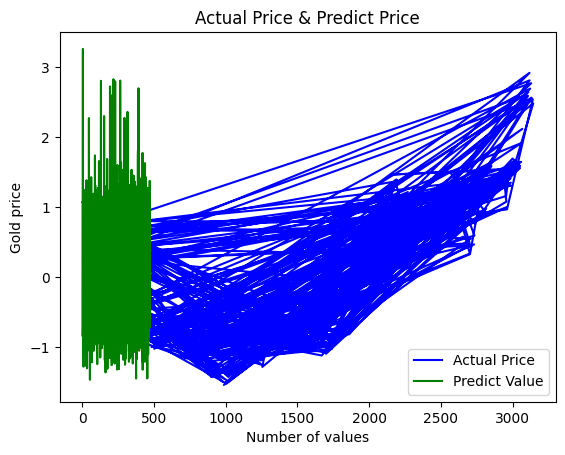

In [248]:
# y1_test = list(y1_test)

# Vẽ giá trị thực tế
plt.plot(y1_test, label='Actual Price', c='blue')

# Vẽ giá trị dự đoán
plt.plot(y1_pred, label='Predict Value', c='green')

# Thêm tiêu đề và nhãn cho biểu đồ
plt.title('Actual Price & Predict Price')
plt.legend()
plt.xlabel('Number of values')
plt.ylabel('Gold price')


**GHI CHÚ** 
* Model Randomforest, XGBRegression and DecisionTreeRegression đều sử dụng biến ngẫu nhiên theo công thức train, test split nên sai số , phương sai chênh lệch nhỏ. Ngoài ra, mô hình chạy không theo cấu trúc thời gian nên em sẽ không sử dụng các mô hình này để chạy dự đoán

# **MODEL BUILDING: LSTM MODEL**
Mạng trí nhớ ngắn hạn định hướng dài hạn

In [249]:
df2 = df.copy()
df2

,Date,Close,Silver_Close,VNI_Close,USD_VND_Rate,Hseng_Close,Nikkei_Close,Nikkei_Volume,Dax_Close,SP_Close,DJ_Close,DJ_Volume
0,2012-01-03,"1,600.50",29.57,350.00,"21,031.00","18,877.41","8,537.50","38,060.00","6,166.57","1,277.10","12,397.38","152,560,000.00"
1,2012-01-04,"1,612.70",29.10,348.84,"21,031.00","18,727.31","8,530.00","38,060.00","6,111.55","1,277.30","12,418.42","145,130,000.00"
2,2012-01-05,"1,620.10",29.30,340.94,"21,031.00","18,813.41","8,500.00","24,780.00","6,095.99","1,281.10","12,415.70","158,440,000.00"
3,2012-01-06,"1,616.80",28.68,336.73,"21,033.50","18,593.06","8,390.00","53,280.00","6,057.92","1,277.80","12,359.92","131,120,000.00"
4,2012-01-09,"1,608.10",28.78,339.32,"21,034.50","18,865.72","8,407.50","28,860.00","6,017.23","1,280.70","12,392.69","122,200,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...
3144,2024-06-26,"2,301.00",29.09,"1,261.24","25,465.00","18,089.93","39,635.00","32,720.00","18,155.24","5,477.90","39,127.80","340,840,000.00"
3145,2024-06-27,"2,336.60",29.26,"1,259.09","25,455.00","17,716.47","39,555.00","35,300.00","18,210.55","5,482.87","39,164.06","352,600,000.00"
3146,2024-06-28,"2,339.60",29.56,"1,245.32","25,445.00","17,718.61","39,610.00","32,030.00","18,235.45","5,460.48","39,118.86","688,500,000.00"
3147,2024-07-01,"2,338.90",29.61,"1,254.56","25,450.00","17,769.14","39,512.50","31,650.00","18,290.66","5,475.09","39,169.52","353,380,000.00"


In [250]:
# Xóa cột DJ_Volume do giá trị lớn 
df2.drop('DJ_Volume', axis=1,inplace=True)

In [251]:
df2.index = df2['Date']
df2.drop(columns='Date', inplace=True)

<Axes: xlabel='Date'>

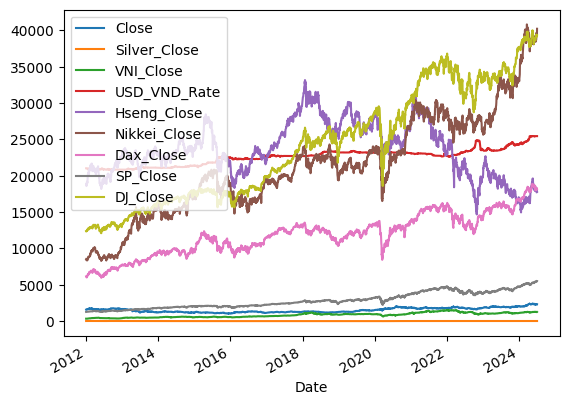

In [252]:
df2.drop('Nikkei_Volume', axis = 1).plot()

In [253]:
from keras.callbacks import ModelCheckpoint # Lưu lại mô hình huấn luyện tốt nhất
from tensorflow.keras.models import load_model # tải mô hình
from keras.models import Sequential #đầu vào
from keras.layers import LSTM #học phụ thuộc
from keras.layers import Dropout # Tránh học tủ
from keras.layers import Dense #đầu ra 
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error

In [254]:
df2_Close = pd.DataFrame(df2['Close'])
data = df2_Close.values
data

array([[1600.5],
       [1612.7],
       [1620.1],
       ...,
       [2339.6],
       [2338.9],
       [2333.4]])

In [255]:
train = df2_Close[:int(len(df1)*0.8)].values 
test = df2_Close[int(len(df1)*0.8):].values 
len(data)

3149

In [256]:
#Chuẩn hóa dữ liệu (Standard Scaler)
ss = StandardScaler()
data = ss.fit_transform(train)

In [257]:
# Tạo vòng lặp các giá trị 
X2_train, y2_train = [],[]
for i in range (50,len(train)):
    X2_train.append(data[i-50:i,0])
    y2_train.append(data[i,0])

print(len(X2_train)) #2096 - 50 dòng 
print(len(y2_train))

# Xếp dũ liệu thành 1 mảng: 
X2_train = np.array(X2_train)
y2_train = np.array(y2_train)

# Xếp lại dữ liệu thành mảng 1 chiều: 
X2_train = np.reshape(X2_train, (X2_train.shape[0], X2_train.shape[1],1))
y2_train = np.reshape(y2_train, (y2_train.shape[0],1))
    

* X_train: Tạo ra các mảng mà mỗi mảng chứa 50 giá đóng cửa liên tục 
* y_train: danh sách các giá đóng cửa của ngày hôm sau

In [259]:
X2_train

[array([0.72582327, 0.77667151, 0.80751388, 0.79375985, 0.75749922,
        0.85502781, 0.88878771, 0.9225476 , 0.85211029, 0.95547392,
        0.97339584, 0.95088924, 0.99048418, 1.05008498, 0.99256812,
        1.14094495, 1.25181078, 1.27473416, 1.28390352, 1.30891085,
        1.34683863, 1.38768394, 1.30849406, 1.24430858, 1.34225395,
        1.27098306, 1.31224516, 1.24597573, 1.24430858, 1.21429978,
        1.25764582, 1.25889619, 1.24847647, 1.38434963, 1.4376986 ,
        1.50021692, 1.45895483, 1.45270299, 1.50896949, 1.1876253 ,
        1.23305528, 1.18137346, 1.15678292, 1.02424408, 1.07342516,
        1.1351099 , 1.18845888, 1.13969458, 1.11635441, 0.90254174]),
 array([0.77667151, 0.80751388, 0.79375985, 0.75749922, 0.85502781,
        0.88878771, 0.9225476 , 0.85211029, 0.95547392, 0.97339584,
        0.95088924, 0.99048418, 1.05008498, 0.99256812, 1.14094495,
        1.25181078, 1.27473416, 1.28390352, 1.30891085, 1.34683863,
        1.38768394, 1.30849406, 1.24430858, 1.

In [260]:
y2_train

[0.9717286827862583,
 0.956307496025146,
 1.004238211634008,
 0.9196300788635823,
 0.9333841102991686,
 0.9008745814514189,
 0.9838155588963196,
 1.0805105677768054,
 1.0775930459571363,
 0.9650600614841561,
 0.952556396542714,
 1.0234104978775533,
 1.055920026725303,
 1.0238272867089344,
 0.7825065533390986,
 0.8491927663601239,
 0.906709625090759,
 0.9767301487628354,
 0.9750629934373094,
 1.0596711262077352,
 0.9746462046059283,
 0.9308833773108804,
 0.9367184209502196,
 0.8887877053413576,
 0.8962899043062238,
 0.902124947945563,
 0.8596124871446591,
 0.9062928362593771,
 0.9000410037886559,
 0.9758965711000724,
 0.9938184908494728,
 0.9913177578611847,
 0.9838155588963196,
 0.9488052970602808,
 0.8687818414350502,
 0.9121278798987171,
 0.8867037611844506,
 0.7424948255264837,
 0.6995655758941989,
 0.704983830702157,
 0.657053115093295,
 0.5611916838755711,
 0.5449369194516958,
 0.4594952090185071,
 0.6191253314375872,
 0.6899794327724267,
 0.6766421901682214,
 0.6262107415710704,


In [262]:
X2_train

array([[[0.72582327],
        [0.77667151],
        [0.80751388],
        ...,
        [1.13969458],
        [1.11635441],
        [0.90254174]],

       [[0.77667151],
        [0.80751388],
        [0.79375985],
        ...,
        [1.11635441],
        [0.90254174],
        [0.97172868]],

       [[0.80751388],
        [0.79375985],
        [0.75749922],
        ...,
        [0.90254174],
        [0.97172868],
        [0.9563075 ]],

       ...,

       [[1.42519493],
        [1.41435842],
        [1.43436429],
        ...,
        [1.56648635],
        [1.60608128],
        [1.59399441]],

       [[1.41435842],
        [1.43436429],
        [1.49438188],
        ...,
        [1.60608128],
        [1.59399441],
        [1.60274697]],

       [[1.43436429],
        [1.49438188],
        [1.48187821],
        ...,
        [1.59399441],
        [1.60274697],
        [1.58149074]]])

In [263]:
y2_train

array([[0.97172868],
       [0.9563075 ],
       [1.00423821],
       ...,
       [1.60274697],
       [1.58149074],
       [1.61608422]])

In [264]:
# Xây dựng mô hình:
model = Sequential()
model.add(LSTM(units=120, input_shape = (X2_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer = 'adam')

c:\Users\baoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Mô hình có 5 lớp: 
1. Lớp Sequence: Tạo mảng cho dữ liệu đầu vào
2. Lớp LSTM: Mô tả thông tin đầu vào 
3. Dropout: Bỏ qua 1 số đơn vị 1 cách ngẫu nhiên để tránh mô hình học tủ
4. Dense: Output đầu ra 1 chiều 
5. compile: 
* loss='mean_absolute_error': Hàm mất mát là mean_absolute_error, tức là trung bình của các giá trị tuyệt đối của sai số dự báo.
* optimizer='adam': Bộ tối ưu hóa được sử dụng là Adam, một phương pháp tối ưu hóa hiệu quả cho mạng nơ-ron sâu.

In [265]:
# Huấn luyện mô hình: 
# Define the checkpoint
save_model = 'save_model.keras'
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Fit the model
model.fit(X2_train, y2_train, epochs=100, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.18987, saving model to save_model.keras
50/50 - 7s - 135ms/step - loss: 0.1899
Epoch 2/100

Epoch 2: loss improved from 0.18987 to 0.14219, saving model to save_model.keras
50/50 - 4s - 85ms/step - loss: 0.1422
Epoch 3/100

Epoch 3: loss improved from 0.14219 to 0.13374, saving model to save_model.keras
50/50 - 4s - 84ms/step - loss: 0.1337
Epoch 4/100

Epoch 4: loss improved from 0.13374 to 0.13071, saving model to save_model.keras
50/50 - 4s - 79ms/step - loss: 0.1307
Epoch 5/100

Epoch 5: loss improved from 0.13071 to 0.13028, saving model to save_model.keras
50/50 - 4s - 79ms/step - loss: 0.1303
Epoch 6/100

Epoch 6: loss did not improve from 0.13028
50/50 - 4s - 81ms/step - loss: 0.1306
Epoch 7/100

Epoch 7: loss improved from 0.13028 to 0.12970, saving model to save_model.keras
50/50 - 4s - 82ms/step - loss: 0.1297
Epoch 8/100

Epoch 8: loss improved from 0.12970 to 0.12096, saving model to save_model.keras
50/50 - 4s - 83ms/step 

In [266]:
# dữ liệu train 
y2_train = ss.inverse_transform(y2_train) #=> Quy lại giá trị y_train giá ban đầu , convert to the original value
final_model = load_model('save_model.keras')
y_train_pred = final_model.predict(X2_train)
y_train_pred = ss.inverse_transform(y_train_pred)
len(y_train_pred)

78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


2469

In [267]:
# Dữ liệu tập test 
test=df2_Close[len(train)-50:].values
ss_test=ss.fit_transform(test)


In [268]:
# Xử lý dữ liệu test
X_test = []
for i in range (50, test.shape[0]): 
    X_test.append(ss_test[i-50:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1)) ## Hiện tại giá trị đã được scaler

# Dữ liệu test
y_test= df2_Close[int(len(df1)*0.8):].values
y_test_pred = final_model.predict(X_test)
y_test_pred = ss.inverse_transform(y_test_pred) ## Quy trả về giá trị thực

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\baoch\AppData\Local\Temp\ipykernel_13876\2782709305.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_train ['Predict'] = y_train_pred
C:\Users\baoch\AppData\Local\Temp\ipykernel_13876\2782709305.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_test ['Predict'] = y_test_pred


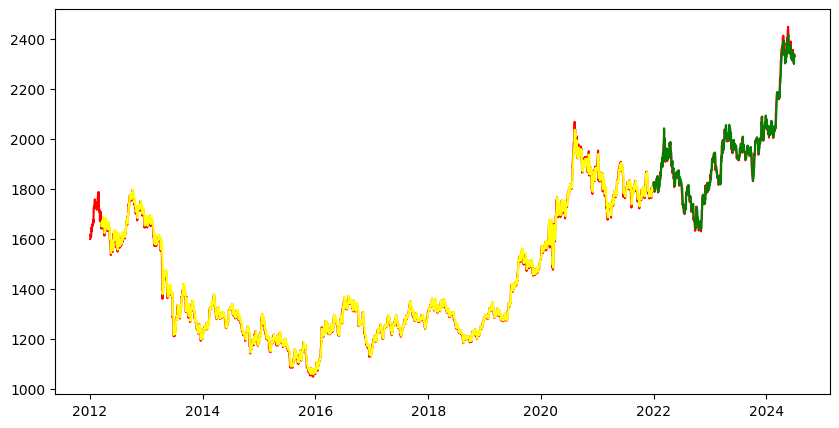

In [292]:
## Lập biểu đồ so sánh
lstm_train = df2_Close[50:int(len(df2)*0.8)]
lstm_test = df2_Close[int(len(df2)*0.8):]

plt.figure(figsize=(10,5))
plt.plot(df2_Close,label = "Giá thực tế", color = 'red') ## Giá đường thực tế
lstm_train ['Predict'] = y_train_pred
lstm_test ['Predict'] = y_test_pred
plt.plot(lstm_train['Predict'], label = "Predict_train", color ='yellow')
plt.plot(lstm_test['Predict'],label = 'Predict_test', color = 'green')



In [270]:
mape = mean_absolute_percentage_error(y_test,y_test_pred)
mae = mean_absolute_error(y_test,y_test_pred)
rsme = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2 = r2_score(y_test,y_test_pred)
print(f'Mean_absolute_percentage_error là {mape}')
print(f'Mean_absolute_error là {mae}')
print(f'Mean_squared_error là {rsme}')
print(f'R2_square là {r2}')

Mean_absolute_percentage_error là 0.0071409052105087835
Mean_absolute_error là 13.981750604538693
Mean_squared_error là 18.436004203991832
R2_square là 0.989491184432478


# **MODEL BUILDING: ARIMA**

In [271]:
df3 = df.copy()
df3.index = df3['Date']
df3.drop(columns='Date', inplace=True)

In [272]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

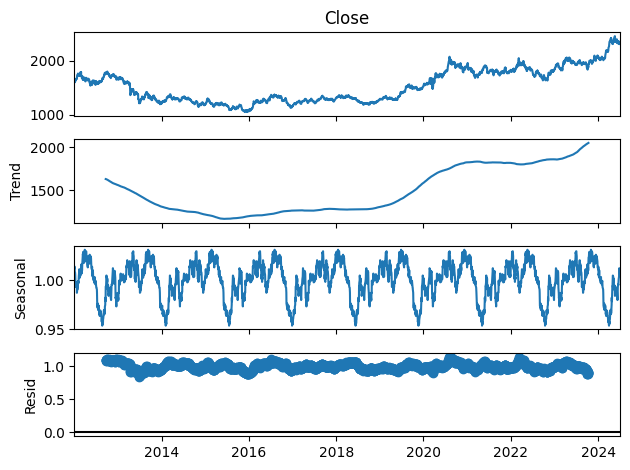

In [273]:
decomposition = seasonal_decompose(df3.Close, model='multiplicative', period=365)
decomposition.plot()
plt.show()

* Trend: Trong năm 2013 đến 2016 có sự tụt giảm nhẹ. bắt đầu từ năm 2016 đến 2019 xu hướng tăng nhẹ qua thời gian. 
Các năm 2019-2022 có sự tăng mạnh. 

* Seasonal: Xu hướng mùa vụ biến động đều đặn qua các năm

* Phần dư : Hoạt động tốt

=> Mô hình phân rã đã nắm bắt được đầy đủ xu hướng và hoạt động hiệu quả theo mùa

In [274]:
df3['Close'] = np.log(df3['Close'])

* **TRAIN, TEST**

In [275]:
train = df3['Close'][: int(len(df3)*0.8)]
test = df3['Close'][int(len(df3)*0.8):]

In [276]:
train

Date
2012-01-03   7.38
2012-01-04   7.39
2012-01-05   7.39
2012-01-06   7.39
2012-01-09   7.38
             ... 
2021-12-23   7.50
2021-12-27   7.50
2021-12-28   7.50
2021-12-29   7.50
2021-12-30   7.50
Name: Close, Length: 2519, dtype: float64

In [277]:
test

Date
2021-12-31   7.51
2022-01-03   7.50
2022-01-04   7.50
2022-01-05   7.51
2022-01-06   7.49
             ... 
2024-06-26   7.74
2024-06-27   7.76
2024-06-28   7.76
2024-07-01   7.76
2024-07-02   7.76
Name: Close, Length: 630, dtype: float64

* **ACF Plot and PCAF Plot**

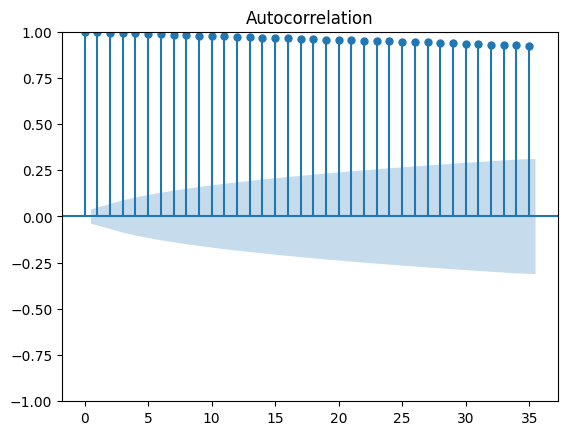

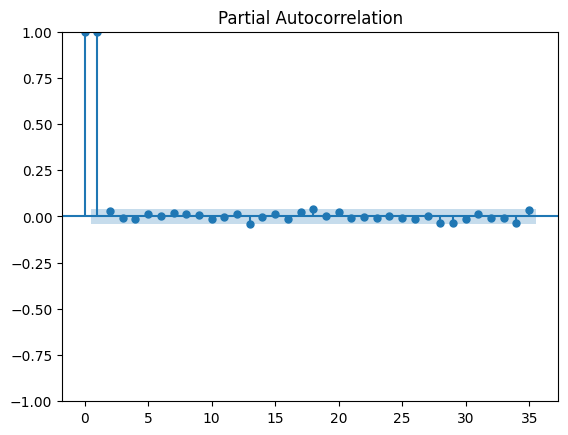

In [278]:
acf_line = plot_acf(train)
pacf_line = plot_pacf(train)

* **ADF TEST**

In [279]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train)

print(f'p-value: {adf_test[1]}')

if adf_test[1] < 0.05:
    print("Reject the null hypothesis. The time series does not have a unit root (stationary).")
else:
    print("Fail to reject the null hypothesis. The time series has a unit root (non-stationary).")

p-value: 0.6824564686927029
Fail to reject the null hypothesis. The time series has a unit root (non-stationary).


* **TRANSFORM TO STATIONARY : DIFFERENCING**

Differencing:
Là phương pháp để biến đổi một chuỗi time series thành chuỗi dừng (stationary), để loại bỏ xu hướng (trend), hay sự tự tương quan (auto-correlation)

<Axes: xlabel='Date'>

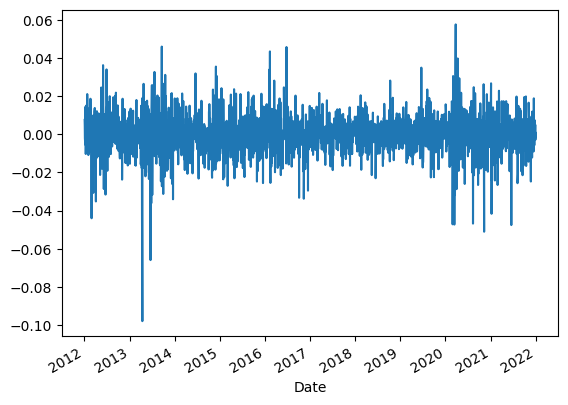

In [280]:
df3_train_diff = train.diff().dropna()
df3_train_diff.plot()

**GHI CHÚ**

* Trong năm 2013, cuối năm 2012 giá vàng đạt đỉnh và bắt đầu tụt giảm mạnh . **Đây là giai đoạn giảm mạnh trong những ngày qua và ghi nhận mức giảm mạnh nhất trong các năm qua. xu hướng giảm phát đang gia tăng trong kinh tế toàn cầu.**

**Lý dó**: Đó là việc các ngân hàng trung ương trên thế giới bơm hàng nghìn tỷ USD vào hệ thống tiền tệ thông qua việc mua trái phiếu của các chính phủ. Đây là một hành động khẩn cấp cần thiết nhằm làm sống lại nền kinh tế. Những làn sóng tiền tệ trên không ra khỏi nhà băng và các thể chế tài chính khác. Thay vì tài trợ cho các dự án đầu tư mới, hành động trên lại khuyến khích nguồn cung và sản xuất vàng. Tiền được các ngân hàng cung cấp phần lớn phục vụ cho đầu cơ vào các thị trường chứng khoán và sản phẩm tiêu dùng. 

* Đầu năm 2020 cho đến năm 2022, giá vàng thế giới liên tục tăng mạnh do bối cảnh sau covid , giai đoạn tăng nóng của nền kinh tế thế giới bao gồm BĐS, hàng hóa và tiền tệ. 

* Năm 2024: Giá vàng tăng mạnh do tỷ giá USD tăng giá, đồng Yên giảm mạnh và đạt kỷ lục chạm 150Y/USD. Ngoài ra còn các lý do như: 

+  Xung đột Ukraine-Nga có thể kéo dài do các cuộc tấn công

- Chính sách tiền tệ của Mỹ khi lãi suất vẫn giữ ở mức 5.25-5.5% trong 6 cuộc họp liên tiếp, cũng như lạm phát Mỹ dai dẳng. Điều này góp phần đẩy giá dầu thô tăng cao, gia tăng lạm phát. Ngân hàng Mỹ có khả năng sẽ giảm lãi suất gây giảm giá đồng USD, đóng vai trò là chất xúc tác tích cực cho giá vàng. 

- Nền kinh tế hiện này vẫn đang ảm đạm, tốc độ tăng trưởng kinh tế chậm dẫn đến NĐT, chính sách quốc gia còn hạn chế. Vì vậy, vàng được kỳ vọng sẽ vẫn hấp dẫn đối với các khoản đầu tư. 

**=>  Nhu cầu sử dụng vàng làm nơi trú ẩn an toàn sẽ còn tiếp diễn, dẫn đến giá vàng có khả năng tiếp tục tăng cao so với mức hiện tại.**


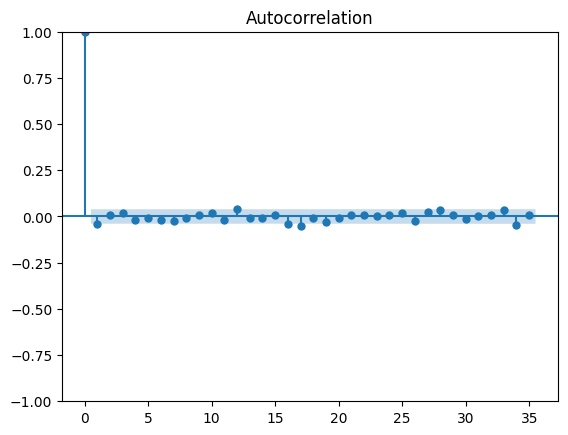

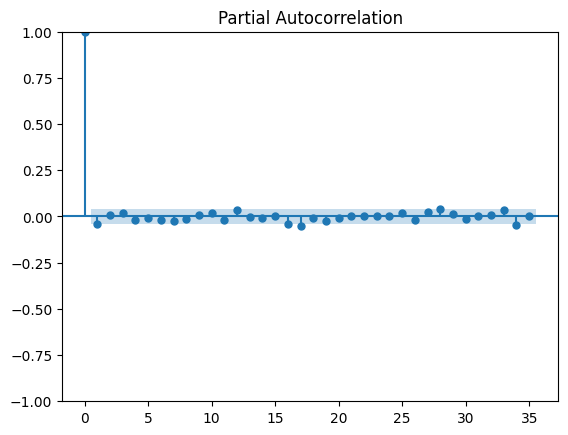

In [281]:
acf_diff = plot_acf(df3_train_diff)
pacf_diff = plot_pacf(df3_train_diff)

In [282]:
from statsmodels.tsa.stattools import adfuller
adf_test_diff = adfuller(df3_train_diff)
p_value = adf_test_diff[1]
print(f'p-value: {p_value}')

if adf_test_diff[1] < 0.05:
    print("Reject the null hypothesis. The differenced time series is stationary.")
else:
    print("Fail to reject the null hypothesis. The differenced time series is non-stationary.")

p-value: 0.0
Reject the null hypothesis. The differenced time series is stationary.


 **GHI CHÚ**
 * Đã triệt tiêu thành phần trend (xu hướng) của chuỗi, và thu được kết quả là một chuỗi dừng.

* **FIT THE ARIMA MODEL**

In [283]:
model = ARIMA(train, order=(1, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2519
Model:                 ARIMA(1, 1, 0)   Log Likelihood                8040.815
Date:                Sun, 07 Jul 2024   AIC                         -16077.631
Time:                        10:18:29   BIC                         -16065.968
Sample:                             0   HQIC                        -16073.398
                               - 2519                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0413      0.015     -2.744      0.006      -0.071      -0.012
sigma2      9.858e-05   1.39e-06     70.961      0.000    9.59e-05       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

c:\Users\baoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\baoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\baoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


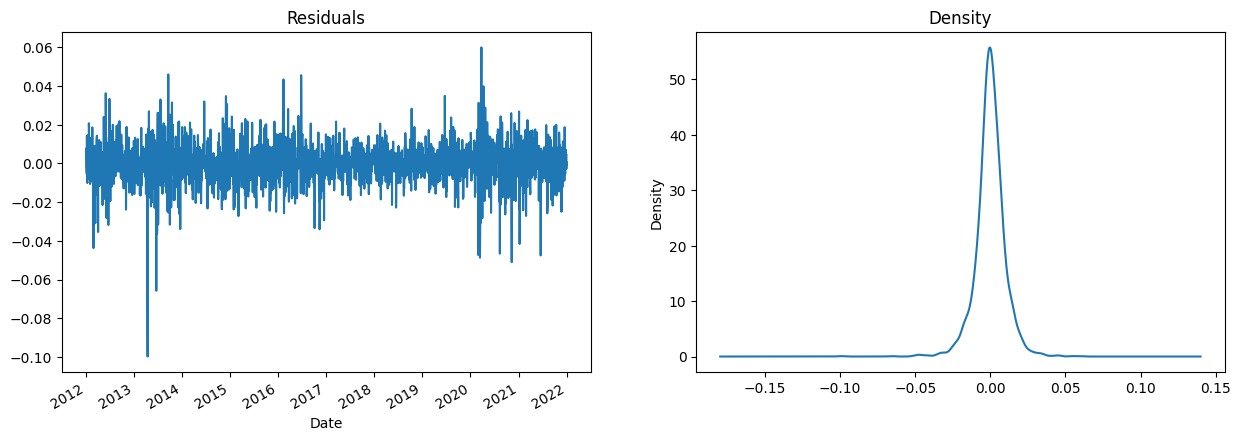

<Figure size 640x480 with 0 Axes>

In [284]:
residuals = model_fit.resid[1:]
fig,ax = plt.subplots(1,2)
plt.figure()
residuals.plot(title = 'Residuals', ax=ax[0],figsize=(15,5))
residuals.plot(title = 'Density',kind = 'kde', ax=ax[1],figsize=(15,5))
plt.show()

**GHI CHÚ** 
* Biểu đồ phần dư trên trục đầu tiên. Giúp kiểm tra xem phần dư có phân phối ngẫu nhiên không. Nếu phần dư không có mẫu hình rõ ràng, điều đó cho thấy mô hình có thể phù hợp với dữ liệu.
* Biểu đồ mật độ phần dư trên trục thứ hai. Hiển thị phân phối của phần dư. Một phân phối chuẩn cho thấy rằng phần dư được phân phối đều đặn quanh giá trị trung bình là 0.
* Các sai số dư có vẻ ổn với giá trị trung bình tiếp cận không và phương sai đồng nhất. 

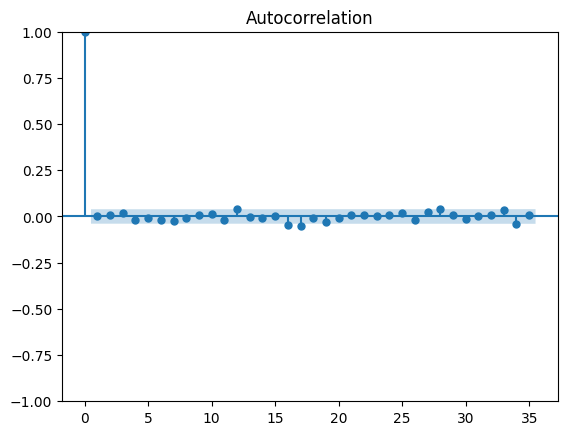

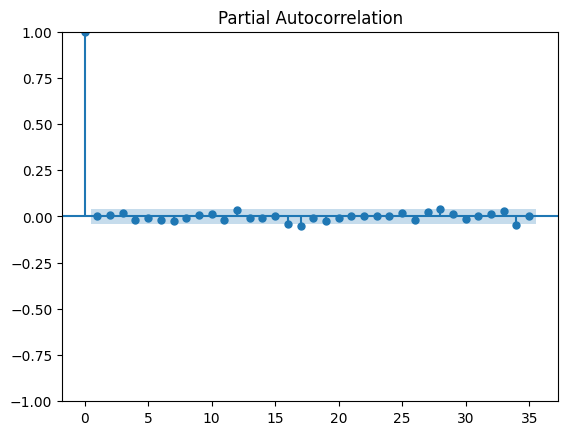

In [285]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

In [286]:
# Forecast using the model
# Forecast using the model
forecast = model_fit.forecast(steps=len(test))
df_test = pd.DataFrame(test)
df_test['forecast'] = forecast.values
np.exp(df_test)

c:\Users\baoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\baoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,Close,forecast
Date,,
2021-12-31,"1,828.60","1,813.76"
2022-01-03,"1,800.10","1,813.77"
2022-01-04,"1,814.60","1,813.77"
2022-01-05,"1,825.10","1,813.77"
2022-01-06,"1,789.20","1,813.77"
...,...,...
2024-06-26,"2,301.00","1,813.77"
2024-06-27,"2,336.60","1,813.77"
2024-06-28,"2,339.60","1,813.77"


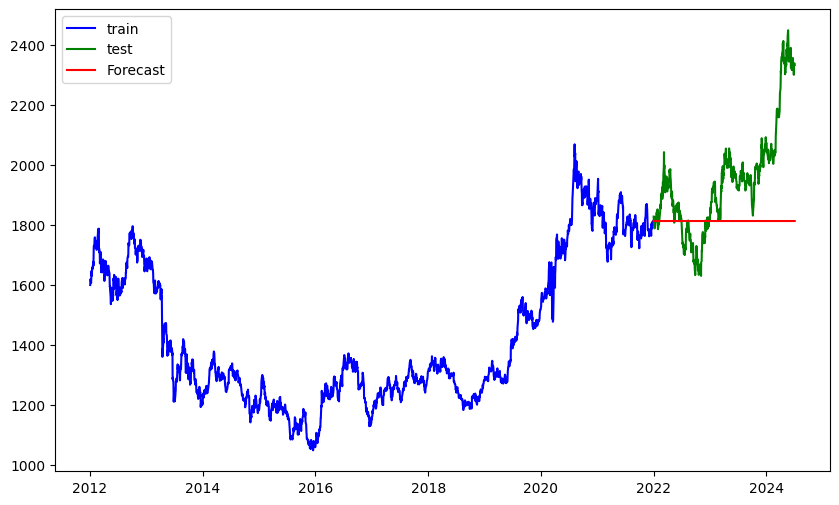

In [287]:
plt.figure(figsize=(10,6))
plt.plot(np.exp(train),label = 'train',c='blue')
plt.plot(np.exp(df_test['Close']),label = 'test',c = 'green')
plt.plot(np.exp(df_test['forecast']),label = 'Forecast', c='red')
plt.legend()
plt.show()

In [288]:
mape = mean_absolute_percentage_error(np.exp(test),np.exp(forecast))
mae = mean_absolute_error(np.exp(test),np.exp(forecast))
rsme = np.sqrt(mean_squared_error(np.exp(test),np.exp(forecast)))
r2 = r2_score(np.exp(test),np.exp(forecast))
print(f'Mean_absolute_percentage_error là {mape}')
print(f'Mean_absolute_error là {mae}')
print(f'Mean_squared_error là {rsme}')
print(f'R2_square là {r2}')

Mean_absolute_percentage_error là 0.08109741118576926
Mean_absolute_error là 167.98063615981
Mean_squared_error là 225.36127072226412
R2_square là -0.5702859277779706


** Mean Absolute Percentage Error (MAPE): MAPE là 0.081, tương đương với 8.1%. Điều này cho thấy rằng, trung bình, mô hình của bạn dự báo với sai số khoảng 8.1% so với giá trị thực tế

** MAE là 167.98, có nghĩa là trung bình, dự báo của mô hình sai lệch khoảng 167.98 đơn vị so với giá trị thực tế => Tương đối nhỏ

** RMSE là 225.36, đại diện cho độ lệch chuẩn của lỗi dự báo. RMSE lớn hơn MAE vì nó phạt các sai số lớn mạnh hơn so với các sai số nhỏ.

**OPTIONAL: Auto fit the ARIMA model**

In [ ]:
import pmdarima as pm 
model = pm.auto_arima(train, start_p=0, start_q= 0, max_q=5, max_p=5, d = None , stepwise = True, seasonal=False)
model

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2519
Model:               SARIMAX(1, 1, 0)   Log Likelihood                8040.815
Date:                Sun, 07 Jul 2024   AIC                         -16077.631
Time:                        09:14:29   BIC                         -16065.968
Sample:                             0   HQIC                        -16073.398
                               - 2519                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0413      0.015     -2.744      0.006      -0.071      -0.012
sigma2      9.858e-05   1.39e-06     70.961      0.000    9.59e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6771.98
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# **MOVING AVERAGE (MA)** KO THUYẾT TRÌNH

In [ ]:
df1

,Date,Close,Silver_Close,VNI_Close,USD_VND_Rate,Hseng_Close,Nikkei_Close,Nikkei_Volume,Dax_Close,SP_Close,DJ_Close,DJ_Volume
0,2012-01-03,0.22,1.70,-1.64,-1.41,-1.29,-1.82,-0.61,-2.01,-1.46,-1.49,-0.70
1,2012-01-04,0.26,1.61,-1.65,-1.41,-1.33,-1.83,-0.61,-2.03,-1.46,-1.49,-0.75
2,2012-01-05,0.29,1.65,-1.67,-1.41,-1.30,-1.83,-0.95,-2.04,-1.45,-1.49,-0.66
3,2012-01-06,0.28,1.53,-1.69,-1.41,-1.36,-1.85,-0.22,-2.05,-1.46,-1.50,-0.85
4,2012-01-09,0.25,1.55,-1.68,-1.41,-1.29,-1.84,-0.84,-2.07,-1.45,-1.49,-0.92
...,...,...,...,...,...,...,...,...,...,...,...,...
3144,2024-06-26,2.48,1.61,1.35,2.63,-1.50,2.61,-0.74,2.20,2.42,1.93,0.64
3145,2024-06-27,2.60,1.64,1.34,2.62,-1.60,2.59,-0.68,2.22,2.43,1.93,0.72
3146,2024-06-28,2.61,1.70,1.30,2.61,-1.60,2.60,-0.76,2.23,2.41,1.93,3.11
3147,2024-07-01,2.60,1.71,1.33,2.62,-1.59,2.59,-0.77,2.25,2.42,1.93,0.73


In [ ]:
df1=df1.set_index("Date")

In [ ]:
df1['MA_50'] = df1['Close'].rolling(window=50).mean()
df1['MA_250'] = df1['Close'].rolling(window=250).mean()


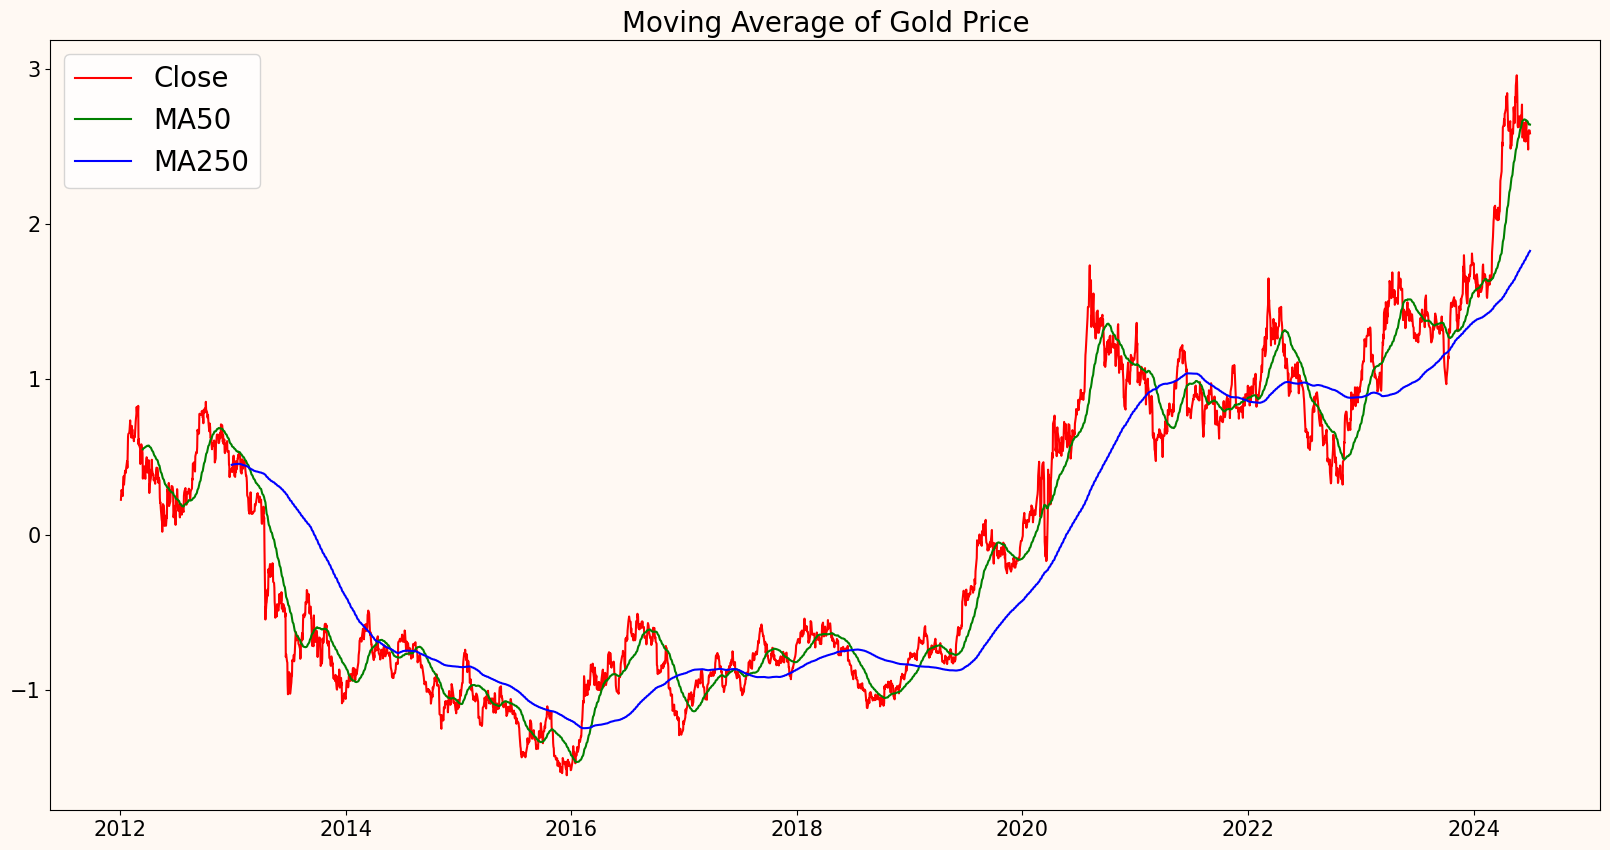

In [ ]:
plt.figure(figsize=(20,10),facecolor='#fff9f3')
plt.plot( df1['Close'], label='Close', c='red')
plt.plot(df1['MA_50'],label = 'MA50', c = 'green')
plt.plot(df1['MA_250'],label = 'MA250', c= 'blue')
plt.title('Moving Average of Gold Price', fontsize = 20)
plt.gca().set_facecolor('#fff9f3')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 20)

Tương tự ở trên, trong năm 2013, giá vàng thế giới có xu hướng giảm đến đầu năm 2016. 

Vào đầu năm 2019, giá vàng tăng mạnh (~ 700-800 USD/lượng vàng) đến cuối năm 2020. 

Tiếp tục xu hướng tăng mạnh trở lại vào năm 2023 ( ~500 USD/lượng) cho đến hiện tại. 

* **Xu hướng cho thấy đường MA50 nằm trên đường MA250 cho thấy xu hướng tăng mạnh đang diễn ra và ngược lại**

* **BACKTESTING MA STRATEGY**

C:\Users\baoch\AppData\Local\Temp\ipykernel_13876\594965521.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1['Signal'][50:] = np.where(df1['MA_50'][50:] > df1['MA_250'][50:],1,0) ## Tương tự hàng if, đối với giá trị MA50 lớn MA250, tr

<Axes: xlabel='Date'>

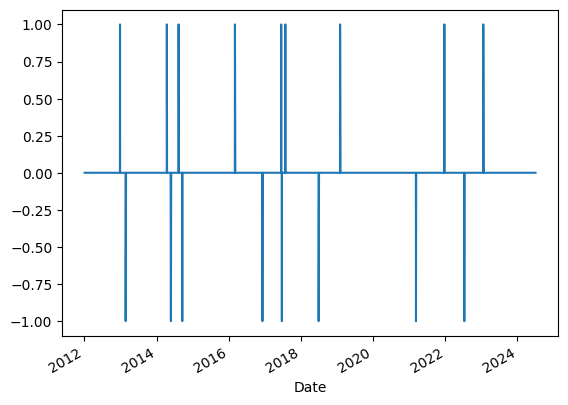

In [ ]:
# 
df1['Signal'] = 0
df1['Signal'][50:] = np.where(df1['MA_50'][50:] > df1['MA_250'][50:],1,0) ## Tương tự hàng if, đối với giá trị MA50 lớn MA250, trả về 1, ngược lại trả giá trị 0
df1['Position'] = df1['Signal'].diff()
df1['Position'].plot()


In [ ]:
df1

,Close,Silver_Close,VNI_Close,USD_VND_Rate,Hseng_Close,Nikkei_Close,Nikkei_Volume,Dax_Close,SP_Close,DJ_Close,DJ_Volume,MA_50,MA_250,Signal,Position
Date,,,,,,,,,,,,,,,
2012-01-03,0.22,1.70,-1.64,-1.41,-1.29,-1.82,-0.61,-2.01,-1.46,-1.49,-0.70,NaN,NaN,0,NaN
2012-01-04,0.26,1.61,-1.65,-1.41,-1.33,-1.83,-0.61,-2.03,-1.46,-1.49,-0.75,NaN,NaN,0,0.00
2012-01-05,0.29,1.65,-1.67,-1.41,-1.30,-1.83,-0.95,-2.04,-1.45,-1.49,-0.66,NaN,NaN,0,0.00
2012-01-06,0.28,1.53,-1.69,-1.41,-1.36,-1.85,-0.22,-2.05,-1.46,-1.50,-0.85,NaN,NaN,0,0.00
2012-01-09,0.25,1.55,-1.68,-1.41,-1.29,-1.84,-0.84,-2.07,-1.45,-1.49,-0.92,NaN,NaN,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26,2.48,1.61,1.35,2.63,-1.50,2.61,-0.74,2.20,2.42,1.93,0.64,2.65,1.81,1,0.00
2024-06-27,2.60,1.64,1.34,2.62,-1.60,2.59,-0.68,2.22,2.43,1.93,0.72,2.65,1.81,1,0.00
2024-06-28,2.61,1.70,1.30,2.61,-1.60,2.60,-0.76,2.23,2.41,1.93,3.11,2.64,1.82,1,0.00


In [ ]:
# Tính toán % biến động cho từng ngày
df1['Return'] = df1['Close'].pct_change()*100  # Phần trăm thay đổi theo ngày 
df1['Strategy_Return']=df1['Return']*df1['Position'].shift(1) # Lùi về sau 1 ngày 
df1

,Close,Silver_Close,VNI_Close,USD_VND_Rate,Hseng_Close,Nikkei_Close,Nikkei_Volume,Dax_Close,SP_Close,DJ_Close,DJ_Volume,MA_50,MA_250,Signal,Position,Return,Strategy_Return
Date,,,,,,,,,,,,,,,,,
2012-01-03,0.22,1.70,-1.64,-1.41,-1.29,-1.82,-0.61,-2.01,-1.46,-1.49,-0.70,NaN,NaN,0,NaN,NaN,NaN
2012-01-04,0.26,1.61,-1.65,-1.41,-1.33,-1.83,-0.61,-2.03,-1.46,-1.49,-0.75,NaN,NaN,0,0.00,17.56,NaN
2012-01-05,0.29,1.65,-1.67,-1.41,-1.30,-1.83,-0.95,-2.04,-1.45,-1.49,-0.66,NaN,NaN,0,0.00,9.06,0.00
2012-01-06,0.28,1.53,-1.69,-1.41,-1.36,-1.85,-0.22,-2.05,-1.46,-1.50,-0.85,NaN,NaN,0,0.00,-3.71,-0.00
2012-01-09,0.25,1.55,-1.68,-1.41,-1.29,-1.84,-0.84,-2.07,-1.45,-1.49,-0.92,NaN,NaN,0,0.00,-10.14,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26,2.48,1.61,1.35,2.63,-1.50,2.61,-0.74,2.20,2.42,1.93,0.64,2.65,1.81,1,0.00,-2.21,-0.00
2024-06-27,2.60,1.64,1.34,2.62,-1.60,2.59,-0.68,2.22,2.43,1.93,0.72,2.65,1.81,1,0.00,4.62,0.00
2024-06-28,2.61,1.70,1.30,2.61,-1.60,2.60,-0.76,2.23,2.41,1.93,3.11,2.64,1.82,1,0.00,0.37,0.00
